## STAGE 0. DOWNLOADING AND IMPORTING ALL THE NECESSARY LIBRARIES

In [1]:
#Data processing libraries

import pandas as pd
import numpy as np 
import random

#Null value handling libraries

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

#Visualisation libraries
import matplotlib.pyplot as plt 
import seaborn as sns

#Statistics libraries
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import shapiro, kstest, poisson, levene, bartlett, mannwhitneyu

#Configuration libraries

pd.set_option ('display.max_columns', None)

# Warnings handling libraries
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")


## STAGE 1. MERGING THE TWO DATAFRAMES

In [2]:
#At this stage, first, we prompt Pandas library to read both .csvs:

df_activity = pd.read_csv('Customer Flight Activity.csv')
df_loyalty = pd.read_csv('Customer Loyalty History.csv')

In [3]:
#We inspect the columns of both dataframes to decide on the type of union we wish to perform.

df_activity.columns 


Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [4]:
df_loyalty.columns 


Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

In [5]:
#After a careful inspection, we deduce that the two dataframes have a single column in common: 'Loyalty Number'.

#We opt to merge the two dataframes using the merge method. 
#This creates a single dataframe which we shall name df_merge. 

df_merge=df_activity.merge(df_loyalty, on='Loyalty Number', how='outer')

In [6]:
#Finally, before commencing stage 3, that of the Exploratory Data Analysis (EDA), we do a brief visualization of the first/last/random columns of our new dataframe,
#using the operators .head, .tail, and .sample

df_merge.head(5)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
1,100018,2017,2,2,2,4,1320,132.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
2,100018,2018,10,6,4,10,3110,311.0,385,31,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
3,100018,2017,4,4,0,4,924,92.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN
4,100018,2017,5,0,0,0,0,0.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN


**Annotation:**

>It is evident that the 'Loyalty number' is repeated multiple times.

In [11]:
df_merge ['Loyalty Number'].nunique()

16737

**Annotation:**

>We verify that the number of unique values of 'Loyalty Number' in our final DataFrame df_merge matches the total number of entries in the original DataFrame (16737).

>Therefore, the explanation for the multiple appearances is that, after joining both DataFrames, each 'Loyalty Number' has multiple flights associated with it.

In [7]:
df_merge.tail(5) 

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
405619,999986,2018,7,15,0,15,1995,199.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
405620,999986,2018,9,0,0,0,0,0.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
405621,999986,2018,10,6,0,6,708,70.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
405622,999986,2018,11,11,4,15,2040,204.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
405623,999986,2018,12,0,0,0,0,0.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN


In [8]:
df_merge.sample(5)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
338164,847771,2017,4,10,5,15,2955,295.0,0,0,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,88445.0,Married,Nova,4277.27,Standard,2014,3,NaN,NaN
123087,374421,2018,4,0,0,0,0,0.0,0,0,Canada,Quebec,Montreal,H2Y 2W2,Female,Bachelor,66652.0,Married,Aurora,7281.72,Standard,2018,9,NaN,NaN
359408,896592,2017,9,10,0,10,810,81.0,0,0,Canada,Quebec,Montreal,H2T 2J6,Female,Master,77085.0,Divorced,Aurora,6071.91,Standard,2018,12,NaN,NaN
179339,497756,2017,12,0,0,0,0,0.0,0,0,Canada,Alberta,Banff,T4V 1D4,Female,Bachelor,74164.0,Single,Nova,2872.05,Standard,2018,11,NaN,NaN
196392,536603,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P2T 6G3,Female,Bachelor,96716.0,Married,Star,5452.17,Standard,2017,11,NaN,NaN


## STAGE 2. EXPLORATORY DATA ANALYSIS (EDA)

In [9]:
#As we begin our EDA process, we proceed to use the operators that will give us even more detailed display of the contents of our new dataframe.

df_merge.columns  # Shows us the names of all the columns of the dataframe in question

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month'],
      dtype='object')

In [12]:
df_merge.shape # Shows us the number of columns and the rows of our dataframe. 
 

(405624, 25)

**Annotation:**

>We conclude there are 25 columns, yet almost 500 000 rows, which lead us to deduct that there is a strong possibility that the null handling process will take long, should we choose to use an imputer.

In [183]:

df_merge.dtypes # This operator allows us to visualize the datatypes in each column. 
#As we do so, we may take decisions regarding the possible change of the types of data in our columns.


Loyalty Number                   int64
Year                             int64
Month                            int64
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
Country                         object
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                  int64
Enrollment Month                 int64
Cancellation Year              float64
Cancellation Month             float64
dtype: object

In [13]:
df_merge.info()  # This operator shows us even more detailed information about our dataframe, allowing us to familiarize ourselves with it.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
 10  Country                      405624 non-null  object 
 11  Province                     405624 non-null  object 
 12  City                         405624 non-null  object 
 13 

In [ ]:
#During the visualisation process, we have spotted an interesting fact.
#The column named 'Postal Code' is marked as object, while we might have been expecting .int.We print the column to check its contents. 

print (df_merge['Postal Code'])

0         T9G 1W3
1         T9G 1W3
2         T9G 1W3
3         T9G 1W3
4         T9G 1W3
           ...   
405619    K1F 2R2
405620    K1F 2R2
405621    K1F 2R2
405622    K1F 2R2
405623    K1F 2R2
Name: Postal Code, Length: 405624, dtype: object


**Annotation:**

>After having printed the column 'Postal Code,' we conclude there is no need to change the data type, due to the fact that some of the Canadian postal codes contain letters.

In [ ]:
#To visualize the entire dataframe now in a more elegant way, we shall use the operator .describe.T 

df_merge.describe().T 

,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.00,326961.00,550834.00,772194.00,999986.00
Year,405624.0,2017.500000,0.500001,2017.00,2017.00,2017.50,2018.00,2018.00
Month,405624.0,6.500000,3.452057,1.00,3.75,6.50,9.25,12.00
Flights Booked,405624.0,4.115052,5.225518,0.00,0.00,1.00,8.00,21.00
Flights with Companions,405624.0,1.031805,2.076869,0.00,0.00,0.00,1.00,11.00
Total Flights,405624.0,5.146858,6.521227,0.00,0.00,1.00,10.00,32.00
Distance,405624.0,1208.880059,1433.155320,0.00,0.00,488.00,2336.00,6293.00
Points Accumulated,405624.0,123.667002,146.579083,0.00,0.00,50.00,239.00,676.00
Points Redeemed,405624.0,30.696872,125.486049,0.00,0.00,0.00,0.00,876.00
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.00,0.00,0.00,0.00,71.00


**What are we seeing here, exactly?**

Let us try to comprehend the results given to us in certain columns, for example, the column `Distance`: 

- `count`: The number of not-null observations in the column 'Distance'.

- `mean`: The mean total distance throughout the column. 

- `std`: Standard deviation, which measures the distance dispersion.  

- `min`: The minimum distance in the dataset.  

- `25%`:The 25th percentile, which represents the value below which 25% of the data lies.

- `50%`:The median or 50th percentile, which is the value that divides the data set into two equal halves.

- `75%`: The 75th percentile, which represents the value below which 75% of the data lies.

- `max`: The maximum distance in the dataset.  

In [ ]:
#Due to the fact the number of rows in our dataframes is very big, we opt to display numerical data and categorical data columns separately:

In [28]:
#Numerical data columns:

df_merge.select_dtypes(include=[int])

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Enrollment Year,Enrollment Month
0,100018,2017,1,3,0,3,152,0,0,2016,8
1,100018,2017,2,2,2,4,132,0,0,2016,8
2,100018,2018,10,6,4,10,311,385,31,2016,8
3,100018,2017,4,4,0,4,92,0,0,2016,8
4,100018,2017,5,0,0,0,0,0,0,2016,8
...,...,...,...,...,...,...,...,...,...,...,...
405619,999986,2018,7,15,0,15,199,0,0,2018,2
405620,999986,2018,9,0,0,0,0,0,0,2018,2
405621,999986,2018,10,6,0,6,70,0,0,2018,2
405622,999986,2018,11,11,4,15,204,0,0,2018,2


In [29]:
df_merge.select_dtypes(include=[float])

,Distance,Salary,CLV,Cancellation Year,Cancellation Month
0,1521.0,92552.0,7919.20,NaN,NaN
1,1320.0,92552.0,7919.20,NaN,NaN
2,3110.0,92552.0,7919.20,NaN,NaN
3,924.0,92552.0,7919.20,NaN,NaN
4,0.0,92552.0,7919.20,NaN,NaN
...,...,...,...,...,...
405619,1995.0,46594.0,8257.01,NaN,NaN
405620,0.0,46594.0,8257.01,NaN,NaN
405621,708.0,46594.0,8257.01,NaN,NaN
405622,2040.0,46594.0,8257.01,NaN,NaN


In [192]:
#Categorical data columns:

df_merge.select_dtypes(include=[object])

,Country,Province,City,Postal Code,Gender,Education,Marital Status,Loyalty Card,Enrollment Type
0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,Standard
1,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,Standard
2,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,Standard
3,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,Standard
4,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,Standard
...,...,...,...,...,...,...,...,...,...
405619,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,Married,Nova,2018 Promotion
405620,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,Married,Nova,2018 Promotion
405621,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,Married,Nova,2018 Promotion
405622,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,Married,Nova,2018 Promotion


In [15]:
#The next step in the EDA exploration would be the visualisation of the unique values in a certain column, or all columns for that matter:

df_merge['Country'].unique()


array(['Canada'], dtype=object)

In [14]:
df_merge['Country'].nunique() #Using the operator .nunique we visualize the number of unique values in a sample column of our choice. 



1

**Annotation:**

>The result leads us to conclude that all the flying customers are from the same country, Canada.

In [ ]:
df_merge['Country'].value_counts()  # Finally, using the operator .value_counts, we are able to visualize the number of values in the 'Country' column. 



Country
Canada    405624
Name: count, dtype: int64

**Annotation:**

>It is, as expected, 405624 due to the fact that there are 405624 rows in our dataframe. 

In [ ]:
#In case we wished to visualize the unique values of all the columns of our dataframe, we would have to iterate through each and every one of them using a 'for' loop:

for col in df_merge:
    print(f'These are the unique values of the column {col.upper()}')
    print(df_merge[col].unique())
    print('\n ------------------------------ \n')

These are the unique values of the column LOYALTY NUMBER
[100018 100102 100140 ... 999940 999982 999986]

 ------------------------------ 

These are the unique values of the column YEAR
[2017 2018]

 ------------------------------ 

These are the unique values of the column MONTH
[ 1  2 10  4  5  6  7  9  8 11 12  3]

 ------------------------------ 

These are the unique values of the column FLIGHTS BOOKED
[ 3  2  6  4  0 10  9 13  1 14  7  5 11 17  8 15 12 16 20 18 19 21]

 ------------------------------ 

These are the unique values of the column FLIGHTS WITH COMPANIONS
[ 0  2  4  1  5  3  7  6  8  9 10 11]

 ------------------------------ 

These are the unique values of the column TOTAL FLIGHTS
[ 3  4 10  0  5 13 15  6 14  1 17  7 16 11 23  9  8 18 19 12 21  2 20 22
 28 26 29 27 25 24 30 31 32]

 ------------------------------ 

These are the unique values of the column DISTANCE
[1521. 1320. 3110. ... 4162. 1979. 5676.]

 ------------------------------ 

These are the unique valu

In [22]:
df_merge['Salary'].min()


-58486.0

In [ ]:
#At this stage, another thing we as a data analyst can do is simply visualize the duplicated values as well as null values. 
#Afterwards, during the stage 3, DATA CLEANSING/DATA SCRUBBING we will act upon these values and decide on how best to handle them. 

#Visualization of duplicates:

df_merge.duplicated().sum()

1864

In [16]:
#Visualization of the null values:

nulls=df_merge.isnull().sum()
nulls.sort_values(ascending=False)


Cancellation Month             355560
Cancellation Year              355560
Salary                         102672
Postal Code                         0
Enrollment Month                    0
Enrollment Year                     0
Enrollment Type                     0
CLV                                 0
Loyalty Card                        0
Marital Status                      0
Education                           0
Gender                              0
Loyalty Number                      0
Year                                0
Province                            0
Country                             0
Dollar Cost Points Redeemed         0
Points Redeemed                     0
Points Accumulated                  0
Distance                            0
Total Flights                       0
Flights with Companions             0
Flights Booked                      0
Month                               0
City                                0
dtype: int64

In [18]:
# We can visualize the percentage of null values thusly:

null_values = df_merge.isnull().sum()/df_merge.shape[0]*100
null_values.sort_values(ascending=False)



Cancellation Month             87.657535
Cancellation Year              87.657535
Salary                         25.312112
Postal Code                     0.000000
Enrollment Month                0.000000
Enrollment Year                 0.000000
Enrollment Type                 0.000000
CLV                             0.000000
Loyalty Card                    0.000000
Marital Status                  0.000000
Education                       0.000000
Gender                          0.000000
Loyalty Number                  0.000000
Year                            0.000000
Province                        0.000000
Country                         0.000000
Dollar Cost Points Redeemed     0.000000
Points Redeemed                 0.000000
Points Accumulated              0.000000
Distance                        0.000000
Total Flights                   0.000000
Flights with Companions         0.000000
Flights Booked                  0.000000
Month                           0.000000
City            

**Annotation:**

>The three columns contain variables relevant for the analysis, as both salary and membership cancellation percentage could be of interest for the study.

>The three columns contain numerical variables.

>The three columns show a high percentage of null values, especially 'Cancellation Year' and 'Cancellation Month'.

>The high percentages of null values, specifically, 87 %, and 25 %, leads us to believe we might have to use an automatized null value filler such as Iterative Imputer or KNN imputer during our Data Cleansing process. 

In [20]:
#Final visualization conclusion:

#After detailed inspection, we have concluded there are three numerical columns with null values: 'Cancellation Month,' 'Cancellation Year', 'Salary'.

#We can do a quick visualization of them with a basic histogram 
# (there is no need to go into further details at this stage.)

numerical_columns_with_null_values = df_merge[df_merge.columns[df_merge.isnull().any()]].select_dtypes(include = "number").columns

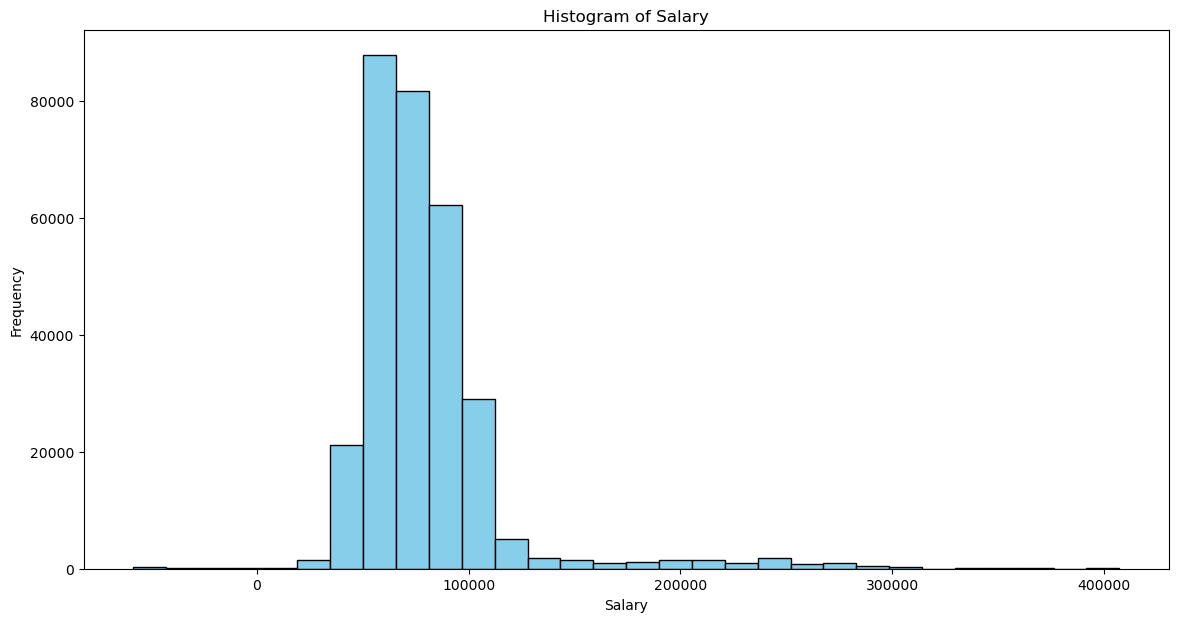

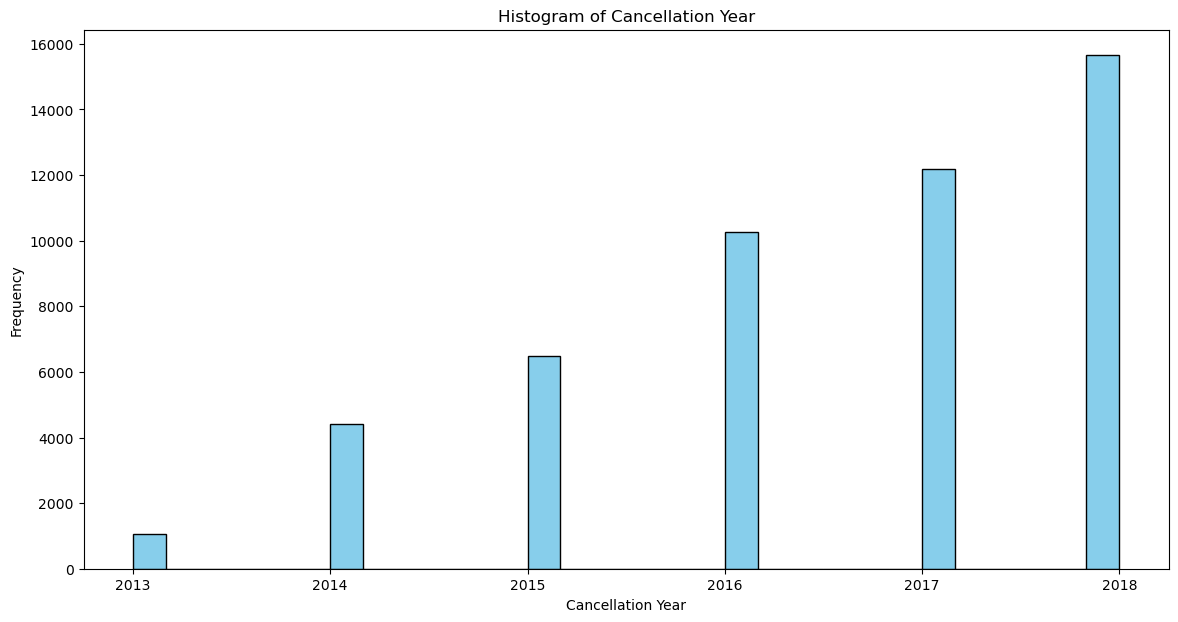

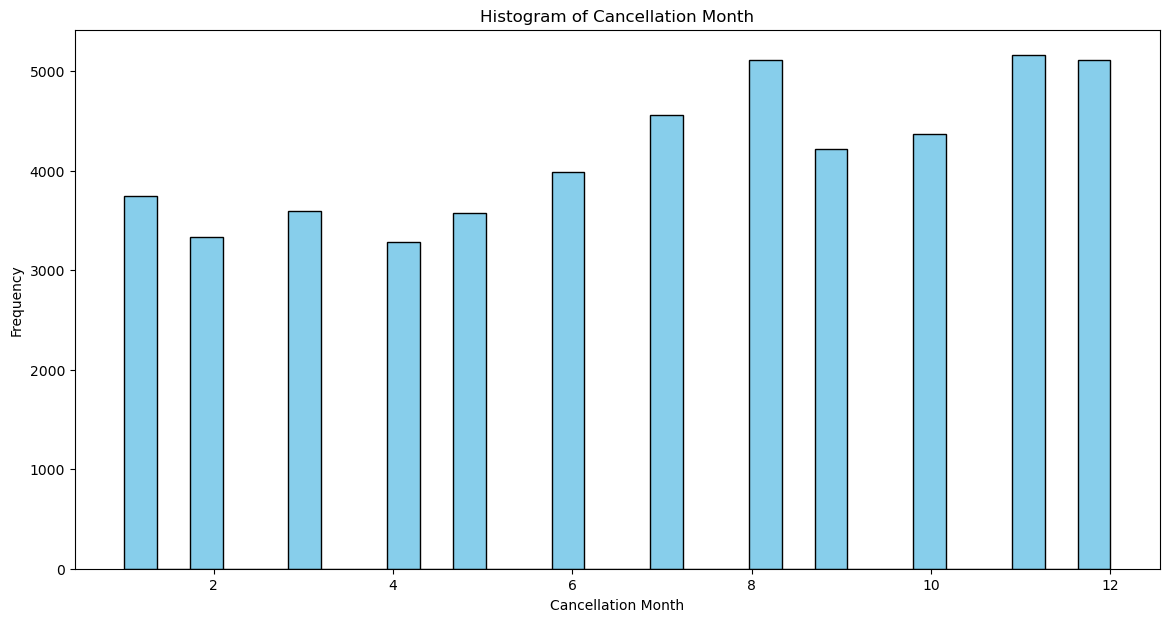

In [21]:
#Using a 'for' loop we visualize all three columns at once:

for col in list(numerical_columns_with_null_values):
    plt.figure(figsize=(14, 7))
    plt.hist(df_merge[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

**Histogram of Salary:**

Distribution:

The distribution is right-skewed (positively skewed). This means that most salaries are concentrated towards the lower end of the range, and there are fewer individuals with very high salaries.
There's a clear peak around the 50,000 to 75,000 range, indicating this is the most common salary bracket.
The long tail extending towards the higher salaries suggests the presence of outliers or individuals with significantly higher incomes.

Insights:

The data shows that the salary distribution is not uniform or symmetrical. This is typical in many real-world salary datasets.

**Histogram of Cancellation Year:**

Distribution:

This histogram shows a trend over time. The frequency of cancellations increases as the years progress.
The bars show a clear upward trend, with the highest cancellation frequency in 2018.
The distribution is not a standard distribution, but rather a representation of counts per year.

Insights:

There's a significant increase in cancellations in recent years, particularly from 2016 to 2018.
This trend suggests that there might be underlying factors causing the increase in cancellations.
Possible reasons could include changes in policies, economic conditions, customer behavior, or other relevant factors.

**Histogram of Cancellation Month:**

Distribution:
The histogram shows the frequency of cancellations across the 12 months of the year.
It's not a uniform distribution; there are noticeable variations in cancellation frequencies throughout the year.
There's a clear peak in cancellations around month 8 (August).
There is a general trend of higher cancellations in the later portion of the year.

**Insights:**

**Seasonality:** 

The data suggests a potential seasonal effect on cancellations. August stands out with the highest number of cancellations. This could be due to various factors, such as:
Vacation periods: People might be more likely to cancel services or appointments during vacation months.

**Specific industry trends:** 

Depending on the nature of the data, certain industries might experience higher cancellation rates during particular months.
End of year policy changes.

**Variability:** 

The fluctuations in cancellation frequency across different months indicate that cancellations are not evenly distributed throughout the year.

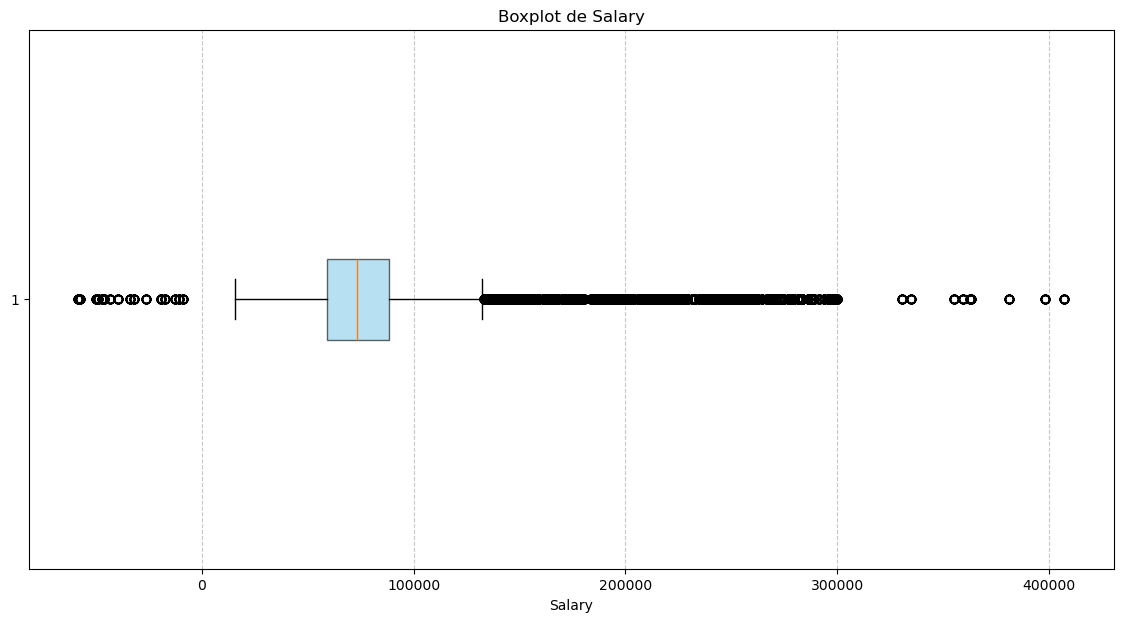

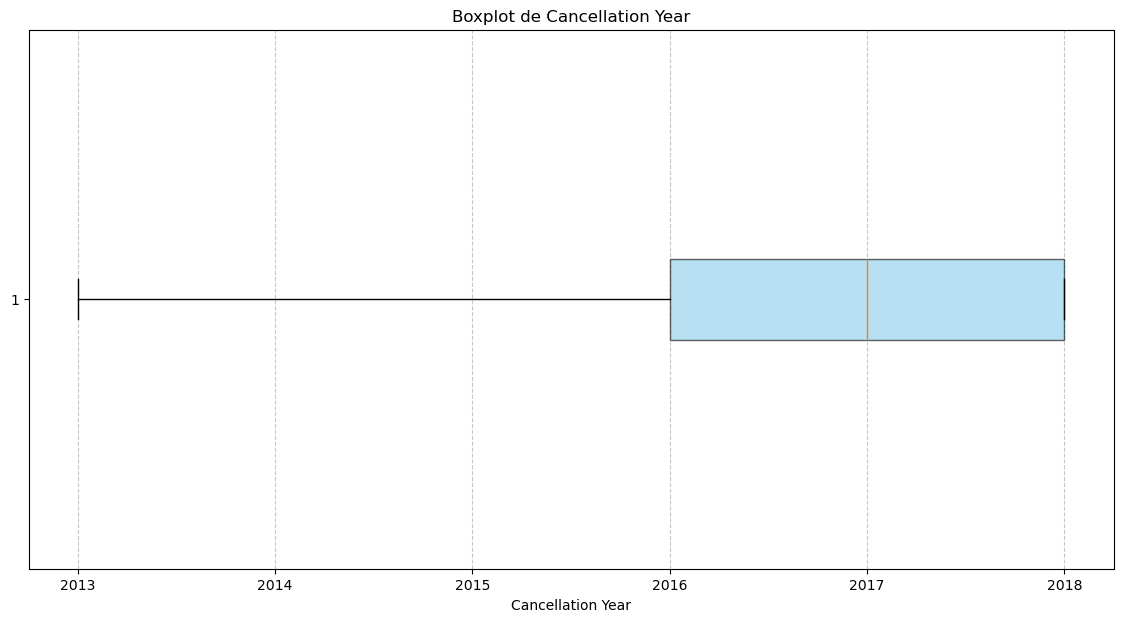

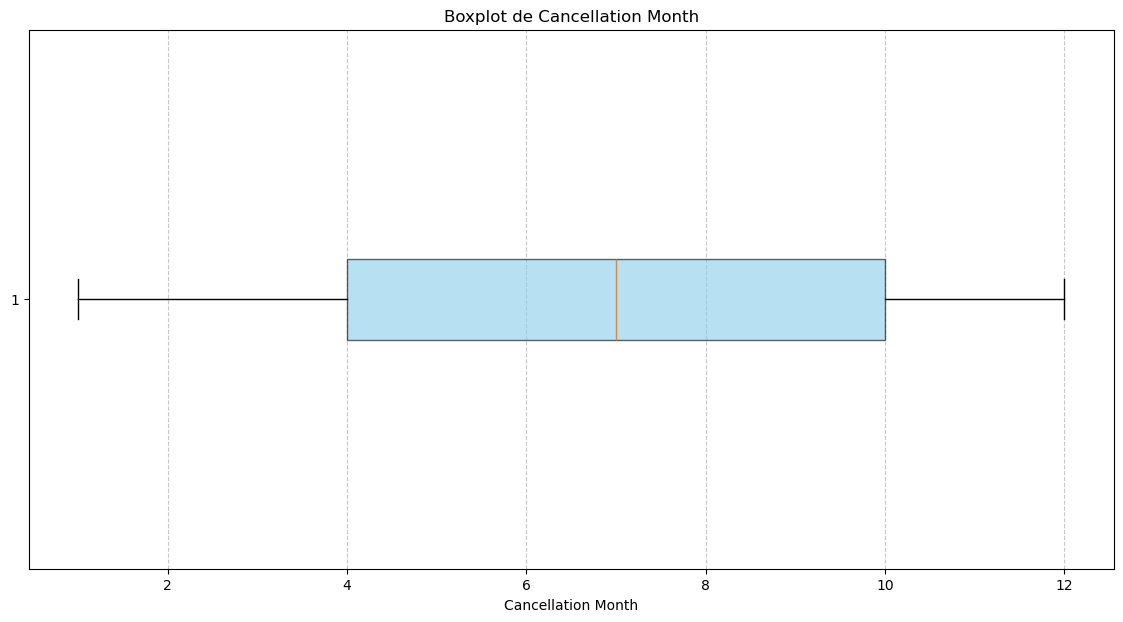

In [208]:
#We check the atypical values using a boxplot: 

for col in numerical_columns_with_null_values:
    plt.figure(figsize=(14, 7))
    plt.boxplot(df_merge[col].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor="skyblue", alpha=0.6))
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.grid(axis='x', linestyle='--', alpha=0.7) 
    plt.show()

**Boxplot of Salary:**

Significant Right Skewness and Outliers:

The boxplot confirms the right-skewed distribution we observed in the histogram. The box itself (representing the interquartile range, IQR) is concentrated towards the lower end of the salary range.
There's a long tail extending to the right, indicating a significant number of high-value outliers. These are the circles plotted beyond the whiskers.
The outliers are very far from the main distribution, suggesting that some individuals have exceptionally high salaries compared to the majority.

Insights:

These outliers could represent senior executives, high-performing sales professionals, or other individuals in specialized roles with high compensation.


**Boxplot of Cancellation Year:**

Limited Outliers:

This boxplot shows a relatively compact distribution. The box extends from approximately 2016 to 2018.
There are a very small amount of outliers on the left hand side of the box plot.

Insights:

The few outliers on the left hand side, represent cancellations that happened before the main bulk of the data.
The data is highly concentrated in the later years.
This confirms the trend observed in the histogram, where cancellations increased in recent years.

**Boxplot of Cancellation Month:**

No Obvious Outliers:

The boxplot shows a fairly symmetrical distribution around the median.
There are no obvious outliers marked outside of the whiskers.

Insights:

While the histogram revealed variations in cancellation frequency across different months, the boxplot suggests that these variations are not extreme enough to be considered outliers.
The spread of the boxplot indicates that cancellations are relatively evenly distributed across the months, with some minor fluctuations.

In [27]:
df_merge.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month'],
      dtype='object')

**STAGE 2 EDA -- FINAL ANNOTATIONS:**

>Conclusions per column: 

Some columns could be merged, and the data type of some columns might be subject to change:

>'Loyalty Number' appears multiple times in a new, merged dataframe, but as we concluded that each loyalty number 
has multiple flights associated with it, these appearances will not be treated as duplicates. Rather, they will be dealt with using filters should the need arise. 

> 'Year' and 'Month' (int64) could be merged into one column of type object/date, while 'Cancellation Year' and 'Cancellation Month' (float 64) could be merged into one column of type object/date?

We decide against both former hypothesis, due to the fact that our analysis might involve looking at trends or patterns on a monthly basis. 
Therefore, keeping the years and the months separate will allow us for easier grouping and aggregation of data by month, or by year. 

> 'Distance' (int64) could be converted to a different numerical value (float64).

> 'Points Accumulated' (float64) and 'Points Redeemed' (float64) could be converted to a different numerical value (int64).

> 'Country' has a single unique value: Canada. 

> 'Postal Code' (object) doesn't need to be converted to (int64) due to the fact that Canadian postal codes contain letters/strings.

> 'Gender' column could be renamed to 'Sex' to further foment political correctness. 

However, sex typically refers to biological characteristics and is mostly used for biological classification and medical research. Due to this fact, we decide against such a change; our dataframe is primarily thematically concerned with flights and flying patterns.

> 'Salary' has a very high standard deviation, negative values and null entries which must be dealt with post haste.

>'CLV' column could be renamed to 'Customer Lifetime Value' since it is more descriptive and easier to understand at a glance than the abbreviation. People unfamiliar with the abbreviation will immediately grasp the meaning of the column. 

In data analysis and reporting, it's generally best to be explicit and avoid abbreviations unless they are widely understood within the specific context. While CLV is a common abbreviation in business and marketing contexts, it's not universally understood, especially by those outside those fields. Therefore, renaming the column to "Customer Lifetime Value" would likely improve clarity and make data more accessible to a wider audience.

> There are 1864 duplicate entries to account for. 

> There are three columns that contain null values, namely ''Salary', 'Cancellation Year' and 'Cancellation Month', and we have familiarized ourselves with their quantity and percentage. 


# STAGE 3. DATA CLEANSING

The data cleansing will be performed in three steps:

**Step 1: Column Cleansing**

**Step 2: Duplicates Elimination**

**Step 3: Null value handling**

Once the three steps are completed, we shall continue with the Stage 4: Visualization. 

**Step 1:**

**Column Cleansing**

In [ ]:
#Since the columns are homogeneous, of vital significance, and there is no redundancy or repeated names,
#we do not see the need to remove them, so we shall only manage the commas and spaces, alter three data types, and rename one of them.

**1.1:**

**Surface Cleansing -- managing the commas and the spaces**

In [42]:
#We enter all the dataframe columns, and trim leading and trailing spaces:

df_merge.columns = df_merge.columns.str.strip()  

In [43]:
#Using the 'for' loop we verify if the column is the object column,
#and then we eliminate all the extra existent commas:

for col in df_merge.columns:
    if df_merge[col].dtypes == "object":
        df_merge[col] = df_merge[col].str.replace(",", "", regex=True) 




**1.2:**

**Column data type handling**

In [ ]:
#Another interesting fact that we noticed is that the column 'Distance' is marked as int, while the columns 'Points Accumulated' 
# and 'Points Redeemed' are marked as float. 

# Regarding the column 'Distance' we shall change data type from int to float.
# Regarding the column 'Points Accumulated,' we shall change data type from float to int.
# Regarding the column 'Points Redeemed,' we shall change data type from float to int.

df_merge['Distance'] = df_merge ['Distance'].astype(float)
df_merge['Points Accumulated'] = df_merge ['Points Accumulated'].astype(int)
df_merge['Points Redeemed'] = df_merge ['Points Redeemed'].astype(int)

**1.3:**

**Column name handling**

In [45]:
#We rename the column 'CLV' to 'Customer Lifetime Value' for enhanced clarity, as mentioned beforehand: 

df_merge.rename(columns={'CLV': 'Customer Lifetime Value'}, inplace=True)

In [47]:
#We see that the change has, verily, taken effect:

df_merge.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'Customer Lifetime Value',
       'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

**Step 2:**

**Duplicates Handling**

In [48]:
#We visualize the duplicates once more for personal commodity, prior to their possible elimination:

df_merge.duplicated().sum()



1864

**Annotation**

> There are 1864 duplicate entries. 

We check whether they are duplicates that should be kept (such as repeated 'Loyalty Number') or if, on the other hand, there are entire rows with duplicate values that can be removed.

In [50]:
duplicates = df_merge[df_merge.duplicated(keep=False)]
duplicates

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,Customer Lifetime Value,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
984,101902,2017,1,0,0,0,0.0,0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN
985,101902,2017,1,0,0,0,0.0,0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN
987,101902,2017,2,0,0,0,0.0,0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN
988,101902,2017,2,0,0,0,0.0,0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN
989,101902,2017,3,0,0,0,0.0,0,0,0,Canada,Ontario,London,M5B 3E4,Female,College,NaN,Married,Aurora,6265.34,Standard,2017,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402331,992168,2017,9,0,0,0,0.0,0,0,0,Canada,Ontario,Toronto,P1J 8T7,Male,High School or Below,66386.0,Married,Nova,5746.33,Standard,2012,9,NaN,NaN
402346,992168,2018,6,0,0,0,0.0,0,0,0,Canada,Ontario,Toronto,P1J 8T7,Male,High School or Below,66386.0,Married,Nova,5746.33,Standard,2012,9,NaN,NaN
402347,992168,2018,6,0,0,0,0.0,0,0,0,Canada,Ontario,Toronto,P1J 8T7,Male,High School or Below,66386.0,Married,Nova,5746.33,Standard,2012,9,NaN,NaN
402354,992168,2018,9,0,0,0,0.0,0,0,0,Canada,Ontario,Toronto,P1J 8T7,Male,High School or Below,66386.0,Married,Nova,5746.33,Standard,2012,9,NaN,NaN


**Annotation** 

> Many of the rows are duplicate, and this is why we decide to maintain their first apparition (keep='first') and drop the rest.

In [51]:
#We procede to delete all the duplicates using the operator .drop_duplicates. 

df_no_duplicates=df_merge.drop_duplicates(keep='first')

In [52]:
#Important note: it is of great significance to firstly create this new dataframe, based on our previous dataframe, df_merge, because then basing ourselves on the new dataframe,
#df_no_duplicates, we will proceed with the Step 3 of the Stage 3: Null Value Handling. 

df_no_duplicates

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,Customer Lifetime Value,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521.0,152,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100018,2017,2,2,2,4,1320.0,132,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
2,100018,2018,10,6,4,10,3110.0,311,385,31,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
3,100018,2017,4,4,0,4,924.0,92,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
4,100018,2017,5,0,0,0,0.0,0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405619,999986,2018,7,15,0,15,1995.0,199,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
405620,999986,2018,9,0,0,0,0.0,0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
405621,999986,2018,10,6,0,6,708.0,70,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN
405622,999986,2018,11,11,4,15,2040.0,204,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN


In [54]:
#We check that there are no more duplicated rows remaining: 

df_no_duplicates.duplicated().sum()

0

**Step 3:**

**Null values handling**

In [55]:
#We visualize all the null values in our dataframe columns once more for personal commodity reasons. 
#As we have concluded before, the three columns that contain null values are 'Cancellation Month', 'Cancellation Year', 'Salary'. 

null_values = df_no_duplicates.isnull().sum().sort_values(ascending=False)
null_values 

Cancellation Month             354110
Cancellation Year              354110
Salary                         102260
Postal Code                         0
Enrollment Month                    0
Enrollment Year                     0
Enrollment Type                     0
Customer Lifetime Value             0
Loyalty Card                        0
Marital Status                      0
Education                           0
Gender                              0
Loyalty Number                      0
Year                                0
Province                            0
Country                             0
Dollar Cost Points Redeemed         0
Points Redeemed                     0
Points Accumulated                  0
Distance                            0
Total Flights                       0
Flights with Companions             0
Flights Booked                      0
Month                               0
City                                0
dtype: int64

In [56]:
# We can visualize the percentage of null values thusly:

null_values = df_merge.isnull().sum()/df_merge.shape[0]*100
null_values.sort_values(ascending=False)

Cancellation Month             87.657535
Cancellation Year              87.657535
Salary                         25.312112
Postal Code                     0.000000
Enrollment Month                0.000000
Enrollment Year                 0.000000
Enrollment Type                 0.000000
Customer Lifetime Value         0.000000
Loyalty Card                    0.000000
Marital Status                  0.000000
Education                       0.000000
Gender                          0.000000
Loyalty Number                  0.000000
Year                            0.000000
Province                        0.000000
Country                         0.000000
Dollar Cost Points Redeemed     0.000000
Points Redeemed                 0.000000
Points Accumulated              0.000000
Distance                        0.000000
Total Flights                   0.000000
Flights with Companions         0.000000
Flights Booked                  0.000000
Month                           0.000000
City            

In [62]:
# Now we'd like to see which data type each column has, in case we had to perform certain modifications:

columns_with_null = ['Cancellation Month', 'Cancellation Year', 'Salary']

# At the same time, we print the percentage of null values using a 'for' loop:

for i in columns_with_null:
    print(f'The column "{i}" is type: {df_no_duplicates.dtypes[i]}')
    print(f'Its null percentage is: {null_values[i]}')
    print('--------------------------------------------------------')

The column "Cancellation Month" is type: float64
Its null percentage is: 87.65753505709722
--------------------------------------------------------
The column "Cancellation Year" is type: float64
Its null percentage is: 87.65753505709722
--------------------------------------------------------
The column "Salary" is type: float64
Its null percentage is: 25.31211170936631
--------------------------------------------------------


In [59]:
#It seems that the 'Cancellation Month', 'Cancellation Year', and 'Salary' columns are type float so we thought to convert them to integers for convenience. We tried to do the following:

columns_to_change = ['Cancellation Month', 'Cancellation Year', 'Salary']
for i in columns_to_change:
   df_no_duplicates[i] = df_no_duplicates[i].astype(int)
df_merge.dtypes

#However, it gives us an error message "Cannot convert non-finite values (NA or inf) to integer"
# because we have null values, which means it won't be able to change those types. 
#We also thought we could use the 'for' loop inside a 'try/except' block, and in the 'except' part, return what cannot be changed as nulls 
# but we would be doing it in vain just to make them appear as integers, so it doesn't make much sense).
#The decision was taken not to change the data type within the columns due to the fact that both prior, and after handling of null values, it would not be possible. 
#The choice was made to fill the null columns with the word "Active" which would disable the option to convert such a non-finite value to integer.


IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [63]:

#Using this detailed 'for' loop, we can see the null values for each column:

for col in columns_with_null:
    print(f'The column "{col}" is type: {df_no_duplicates.dtypes[col]}')
    print(f'Its null value percentage is: {null_values[col]}')
    print(f'Its distribution per category, including null values, is:')
    display(df_no_duplicates[col].value_counts(dropna=False, normalize=True) * 100)
    print('--------------------------------------------------------')

The column "Cancellation Month" is type: float64
Its null value percentage is: 87.65753505709722
Its distribution per category, including null values, is:


Cancellation Month
NaN     87.703091
12.0     1.266099
11.0     1.261888
8.0      1.236378
7.0      1.109570
10.0     1.070438
9.0      1.046166
6.0      0.980781
1.0      0.923073
3.0      0.886418
5.0      0.881464
2.0      0.826233
4.0      0.808401
Name: proportion, dtype: float64

--------------------------------------------------------
The column "Cancellation Year" is type: float64
Its null value percentage is: 87.65753505709722
Its distribution per category, including null values, is:


Cancellation Year
NaN       87.703091
2018.0     3.843620
2017.0     3.008470
2016.0     2.538141
2015.0     1.575193
2014.0     1.075887
2013.0     0.255597
Name: proportion, dtype: float64

--------------------------------------------------------
The column "Salary" is type: float64
Its null value percentage is: 25.31211170936631
Its distribution per category, including null values, is:


Salary
 NaN         25.326927
 101933.0     0.136715
 62283.0      0.083218
 51573.0      0.083218
 61809.0      0.083218
               ...    
-31911.0      0.005944
 64630.0      0.005944
 77950.0      0.005944
 85525.0      0.005944
 46594.0      0.005944
Name: proportion, Length: 5891, dtype: float64

--------------------------------------------------------


In [ ]:
#After performing yet another extensive visualization of the null values in our dataframe, we have assumed that all our variables are important for our analysis and we have decided not to delete any of the columns containing null values. 

#Now, we must make decisions regarding each type of variable.

#Let us commence with what we do know.

#We know our variables in the three columns are numerical, they are float data.

#We are going to manage the nulls in the 'Cancellation Year' and 'Cancellation Month' columns, first.

**Columns 'Cancellation Year' and 'Cancellation Month'**:

>*If 'Cancellation Year' and 'Cancellation Month' refer to customers who cancelled their membership, it means that the null values can most likely be interpreted as that the customers are:*

*a) still active.*

*b) information is lacking (and we prefer not to make the assumption that they are still active).*

> We decided to replace the null values with the word 'Active.' 

In [64]:
df_no_duplicates.loc[:, ['Cancellation Year', 'Cancellation Month']] = df_no_duplicates[['Cancellation Year', 'Cancellation Month']].fillna('Active')

**Column 'Salary'**:

**Handling negative values**

In [66]:
# We create a mask to filter all the negative 'Salary' values:

negative_salary = df_no_duplicates[df_no_duplicates['Salary'] < 0]


# And we make sure to check which 'Loyalty Number' they're associated to: 

negative_salary_loyalty_numbers = negative_salary['Loyalty Number'].unique()


print(f'The count of values whose "Salary" is negative: {negative_salary.shape[0]}.')
print('------------------------------------------------------------------------------------')
print(f"The 'Loyalty Numbers' associated with a negative salary are: {negative_salary_loyalty_numbers}.")

The count of values whose "Salary" is negative: 480.
------------------------------------------------------------------------------------
The 'Loyalty Numbers' associated with a negative salary are: [115505 152016 194065 212128 232755 239955 347013 364596 366599 430398
 436087 491242 525245 542976 603070 729561 734647 790475 906428 959977].


In [67]:
# The next step is to replace these negative values with null values, so that we will only deal with null values, in continuation:

df_no_duplicates.loc[df_no_duplicates['Loyalty Number'].isin(negative_salary_loyalty_numbers), 'Salary'] = np.nan 

In [69]:
# We check that there are no 'Loyalty Numbers' anymore whose 'Salary' columns might be negative:

df_no_duplicates[df_no_duplicates['Salary'] < 0]


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,Customer Lifetime Value,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month


**Handling null values**

>The column 'Salary' has a high percentage of null values, slightly over 25 %, which is why we decided to use one of the advanced techniques that are at our disposal; namely:

*Iterative Imputer* 

or 

*KNN Imputer* 

> After a careful consideration, we've decided to use the K-Nearest Neighbors imputer, rather than the Iterative Imputer.

We made this decision because in this case there are other columns that are closely related to it, such as marital status or educational level. 

These are factors that often influence the salary received, and, therefore, KNN Imputer is a better solution.


In [71]:
imp_knn = KNNImputer(n_neighbors=5)
imp_knn_d = imp_knn.fit_transform(df_no_duplicates[['Salary']])
df_no_duplicates.loc[:,'Salary'] = imp_knn_d
df_no_duplicates['Salary'].describe().T.reset_index().round()





,index,Salary
0,count,403760.0
1,mean,79442.0
2,std,29965.0
3,min,15609.0
4,25%,64001.0
5,50%,79442.0
6,75%,82940.0
7,max,407228.0


In [76]:
#We check the changes have been implemented:

df_no_duplicates.sample(5)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,Customer Lifetime Value,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
94927,312568,2017,3,8,7,15,2595.0,259,395,32,Canada,Quebec,Quebec City,G1B 3L5,Male,Bachelor,54850.000000,Married,Star,8667.09,Standard,2013,10,Active,Active
240347,632399,2017,10,0,0,0,0.0,0,0,0,Canada,Quebec,Montreal,H4G 3T4,Female,Bachelor,69524.000000,Married,Nova,7434.25,Standard,2017,4,Active,Active
280723,722089,2018,7,3,0,3,1908.0,190,0,0,Canada,Quebec,Montreal,H4G 3T4,Male,Bachelor,89932.000000,Married,Star,2569.69,Standard,2017,6,Active,Active
262397,681984,2017,6,12,3,15,2805.0,280,0,0,Canada,Yukon,Whitehorse,Y2K 6R0,Female,College,79441.628829,Single,Aurora,7575.65,Standard,2012,11,Active,Active
80638,279380,2018,11,5,5,10,1370.0,137,0,0,Canada,Ontario,Toronto,P2T 6G3,Male,College,79441.628829,Single,Aurora,7294.49,Standard,2017,10,Active,Active


In [78]:
#We notice that even though the 'Salary' column seemingly has no null values remaining, its float values need to be rounded to two decimal places. 

df_no_duplicates ['Salary'] = df_no_duplicates['Salary'].round(2)
df_no_duplicates.sample(2)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,Customer Lifetime Value,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
286763,734880,2017,12,17,2,19,3515.0,351,0,0,Canada,Ontario,Thunder Bay,K8T 5M5,Male,Doctor,150904.0,Divorced,Star,3593.13,Standard,2013,7,Active,Active
159367,454750,2017,8,9,0,9,2160.0,216,0,0,Canada,Ontario,London,M5B 3E4,Male,Bachelor,82005.0,Married,Nova,2772.50,Standard,2017,4,Active,Active


In [79]:
#In order to complete step 3 of Stage 3 - Data Cleansing, we are going to absolutely make sure that the three columns we performed null handling on don't contain any null values anymore.  

df_no_duplicates.isnull().sum()

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
Country                        0
Province                       0
City                           0
Postal Code                    0
Gender                         0
Education                      0
Salary                         0
Marital Status                 0
Loyalty Card                   0
Customer Lifetime Value        0
Enrollment Type                0
Enrollment Year                0
Enrollment Month               0
Cancellation Year              0
Cancellation Month             0
dtype: int64

In [80]:
#Finally, we are going to save a CSV with a third dataframe without nulls, df_no_nulls, which will serve as a base for Stage 4 - Visualization, and Stage 5 - Bonus Content.  

df_no_duplicates.to_csv('df_no_nulls.csv', index=False)

## STAGE 4. VISUALIZATION

During this phase, we will answer the posed questions, visualize our answers, and, finally, highlight the most important insights obtained post-visualization.

The questions are as follows:

>1. How is the quantity of flights booked per month distributed throughout the year?

>2. Is there a relationship between flight distance and customer loyalty points earned?

>3. What is the distribution of customers by province or state?

>4. How does the average salary compare among the different educational levels of customers?

>5. What is the proportion of customers with different types of loyalty cards?

>6. How are customers distributed according to their marital status and gender?

In [ ]:
#At this stage, first, we prompt the Pandas library to read our latest, data-cleansed csv. 

df_no_nulls = pd.read_csv('df_no_nulls.csv')

In [99]:
#1. How is the quantity of flights booked per month distributed throughout the year?

#First we group the dataframe df_no_nulls by the 'Year' and 'Month' columns. 
#Then, for the each group created in previous step, we calculate the sum of the 'Flights_Booked' column. 
#After the groupby operation, the 'Year' and 'Month' columns become a part of a MultiIndex. 
#reset_index() converts these back into regular columns, making the DataFrame easier to work with for further analysis or visualization.

year_month_distribution= df_no_nulls.groupby(['Year', 'Month'])['Flights Booked'].sum().reset_index()
year_month_distribution

,Year,Month,Flights Booked
0,2017,1,47766
1,2017,2,47691
2,2017,3,64271
3,2017,4,55720
4,2017,5,65279
5,2017,6,80493
6,2017,7,89288
7,2017,8,78692
8,2017,9,63304
9,2017,10,60351


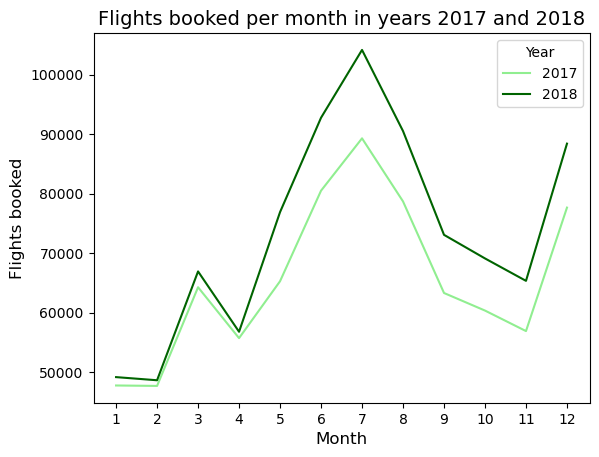

In [100]:
#For visualization, we used line plot since they are excellent in showing trends over time, aka visualizing how a numerical variable changes over a continuous interval, such as time. 

sns.lineplot(x="Month", 
            y="Flights Booked", 
            hue="Year", 
            palette=['#90EE90', '#006400'],
            data=year_month_distribution)

plt.title("Flights booked per month in years 2017 and 2018", fontsize=14)
plt.xticks(ticks=range(1, 13))
plt.xlabel("Month", fontsize=12)
plt.ylabel("Flights booked", fontsize=12);

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

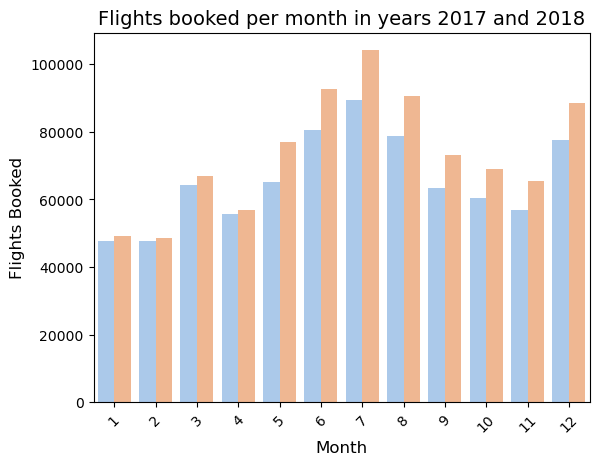

In [101]:
#The second graph we employed is, specifically, a Bar Plot graph, due to the fact that bar plots provide us with clear comparison of discrete quantities, and they are easy to read and interpret. 
#While a line plot emphasizes the overall trend, bar plot gives more visual weight to each invididual month. 

sns.barplot(x="Month", 
            y="Flights Booked",
            hue="Year",
            legend=False,
            data=year_month_distribution, 
            palette='pastel')

plt.title("Flights booked per month in years 2017 and 2018", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Flights Booked", fontsize=12)
plt.xticks(rotation=45)




**Key Observations:**

* **Overall Trend:**
    * There's a general upward trend in flight bookings from the beginning of the year to the middle, peaking around months 6 and 7 (June and July).
    * Bookings tend to remain relatively high in the later months, with some fluctuations.
* **Comparison Between Years:**
    * 2018 (orange bars) generally shows higher flight booking numbers compared to 2017 (blue bars) across most months.
    * The peak in bookings around June and July is more pronounced in 2018.
    * There is a large difference between years in month 12.
* **Seasonal Patterns:**
    * The data suggests a possible seasonal effect, with a surge in bookings during the summer months. This could be attributed to increased travel during vacation periods.
* **Month-Specific Insights:**
    * Months 6 and 7 (June and July) consistently exhibit the highest booking numbers in both years.
    * Month 12 has a very large difference between years, with 2018 being much higher than 2017. This could be due to a holiday promotion, or other factors.
    * Months 1 and 2 show the lowest booking numbers, indicating a potential off-season.



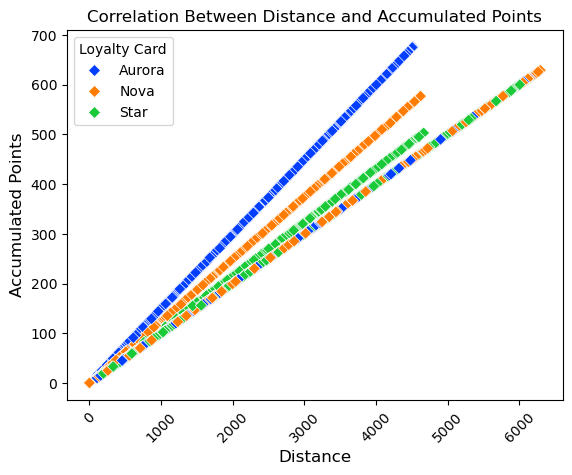

In [89]:
#2. Is there a relationship between flight distance and customer loyalty points earned?

#Since both 'Distance' and 'Points Accumulated' columns contain numerical variables, scatter plot would be ideal to visualize the relationship between the two. 
#Scatter plots allow us to easily identify patterns, trends, and correlations between the variables. 
#We can see if there's a positive correlation (as one variable increases, the other tends to increase) a negative correlation (as one increases, the other decreases), or no clear relationship.

sns.scatterplot(x="Distance", 
                y="Points Accumulated", 
                hue= "Loyalty Card", 
                data=df_no_nulls,  
                marker= "D", 
                palette="bright")
plt.title("Correlation Between Distance and Accumulated Points", fontsize=12)
plt.xlabel('Distance', fontsize=12)
plt.ylabel('Accumulated Points', fontsize=12)
plt.xticks(rotation=45);

In [90]:
#Another useful visualization would be a heatmap, based on a correlattion matrix.
#A correlation matrix provides a numerical representation of the correlation between pairs of variables.
#This gives us a precise measure of the strength and direction of the relationship, typically ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation).   

numerical_variables = df_no_nulls.select_dtypes(include="number").columns

In [91]:
#We calculate the correlation matrix first to be able to include it in our Seaborn visualization. 

correlation_matrix = df_no_nulls[numerical_variables].corr()

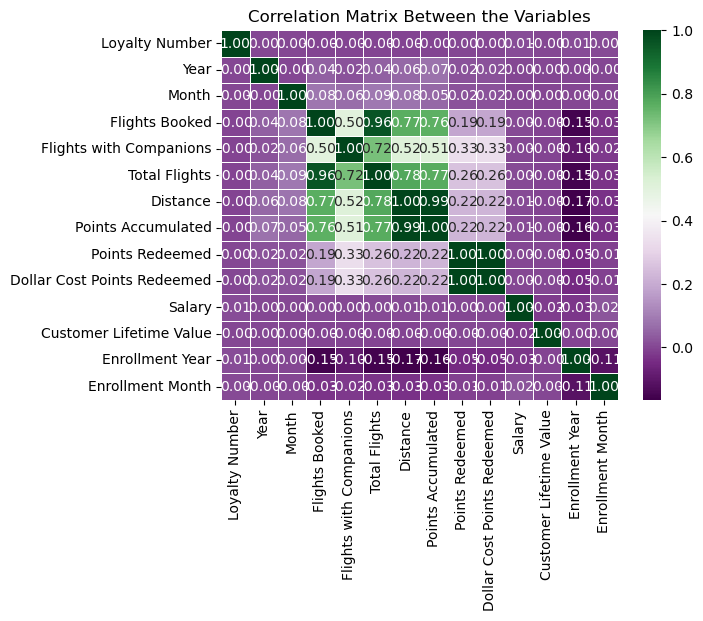

In [92]:
#We use the variable in our heatmap visualization: 

sns.heatmap(correlation_matrix, annot=True, cmap='PRGn', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix Between the Variables')
plt.show()

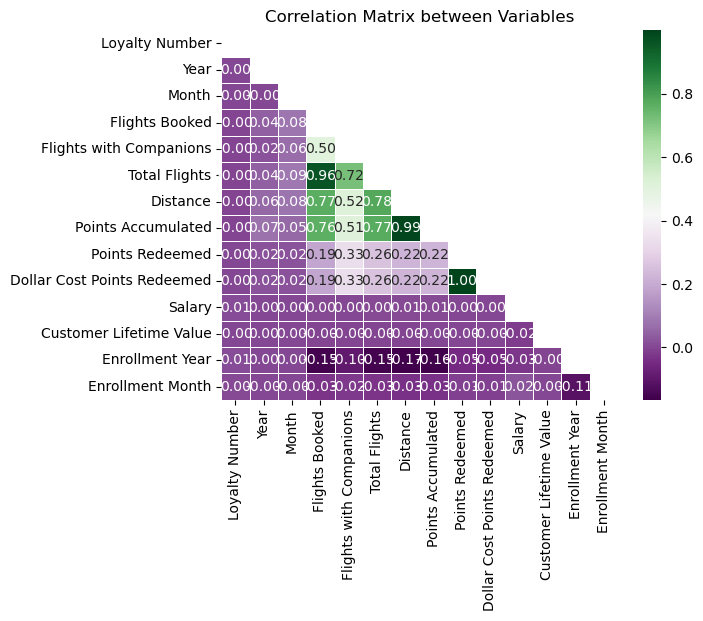

In [94]:
#Finally, we visualize the correlation matrix using seaborn and showing only the upper and lower parts.

#Upper part visualization: 

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, annot=True, mask = mask, cmap='PRGn', fmt='.2f', linewidths=.5)


plt.title('Correlation Matrix between Variables')

plt.show()





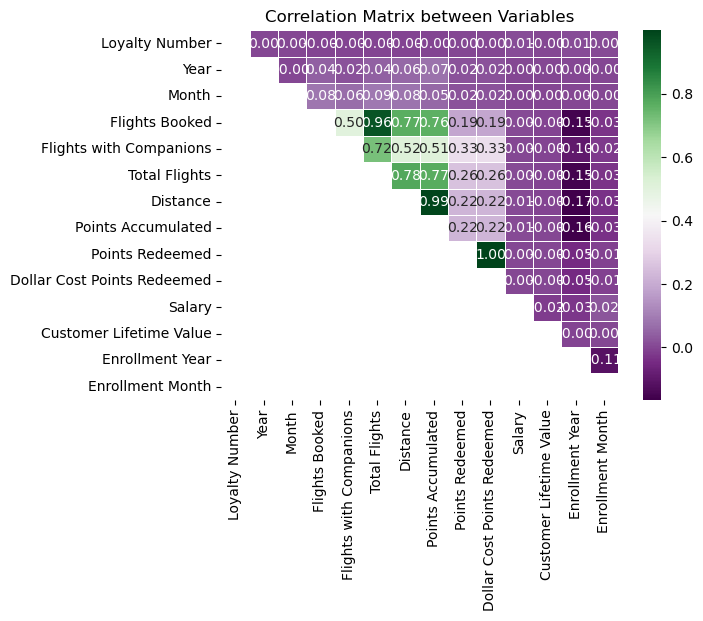

In [95]:
#Lower part visualization:

mask = np.tril(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, annot=True, mask = mask, cmap='PRGn', fmt='.2f', linewidths=.5)


plt.title('Correlation Matrix between Variables')

plt.show()



**Key Observations:**

* **Strong Positive Correlations:**
    * `Flights Booked` and `Total Flights`: A very strong positive correlation (0.96). This is expected, as the total number of flights is closely related to the number of flights booked.
    * `Distance` and `Points Accumulated`: A very strong positive correlation (0.99). This makes sense, as longer flights typically result in more points earned.
    * `Distance` and `Total Flights`: A strong positive correlation (0.78). This suggests that customers who take more flights also tend to fly longer distances.
    * `Points Accumulated` and `Total Flights`: A strong positive correlation (0.77). More flights lead to more points.
    * `Points Redeemed` and `Dollar Cost Points Redeemed`: A perfect positive correlation (1.00). This indicates that these two variables are essentially the same or perfectly linearly related.
* **Moderate Positive Correlations:**
    * `Flights Booked` and `Flights with Companions`: A moderate positive correlation (0.50). Customers who book more flights are somewhat more likely to fly with companions.
    * `Flights with Companions` and `Total Flights`: A moderate positive correlation (0.72)
    * `Flights with Companions` and `Distance`: A moderate positive correlation (0.52)
    * `Flights with Companions` and `Points Accumulated`: A moderate positive correlation (0.51)
* **Weak Correlations:**
    * Most other correlations are weak, indicating little to no linear relationship between those variable pairs.
    * `Loyalty Number` has very low correlation with all the other variables. This is to be expected, as it is just an identification number.
    * `Salary` has extremely low correlation with every other variable.
    * `Year`, and `Month` also have very low correlations with most of the variables.
* **Enrollment Variables:**
    * `Enrollment Year` and `Enrollment Month` have very little correlation with the other variables. This suggests that the timing of enrollment doesn't strongly influence flight behavior or points accumulation.



In [102]:
#3. What is the distribution of customers by province or state?

#In order to calculate this distribution correctly, it is of utmost significance to count unique customers by province with a .nunique filter, due to the fact that some loyalty numbers aka client ids repeat, 
#since many of the clients have flown various times with the airline, and the dataframe annotated each flight. 


province_counts = df_no_nulls.groupby('Province')['Loyalty Number'].nunique().sort_values(ascending=False).reset_index()
province_counts 

,Province,Loyalty Number
0,Ontario,5404
1,British Columbia,4409
2,Quebec,3300
3,Alberta,969
4,Manitoba,658
5,New Brunswick,636
6,Nova Scotia,518
7,Saskatchewan,409
8,Newfoundland,258
9,Yukon,110


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'Ontario'),
  Text(1, 0, 'British Columbia'),
  Text(2, 0, 'Quebec'),
  Text(3, 0, 'Alberta'),
  Text(4, 0, 'Manitoba'),
  Text(5, 0, 'New Brunswick'),
  Text(6, 0, 'Nova Scotia'),
  Text(7, 0, 'Saskatchewan'),
  Text(8, 0, 'Newfoundland'),
  Text(9, 0, 'Yukon'),
  Text(10, 0, 'Prince Edward Island')])

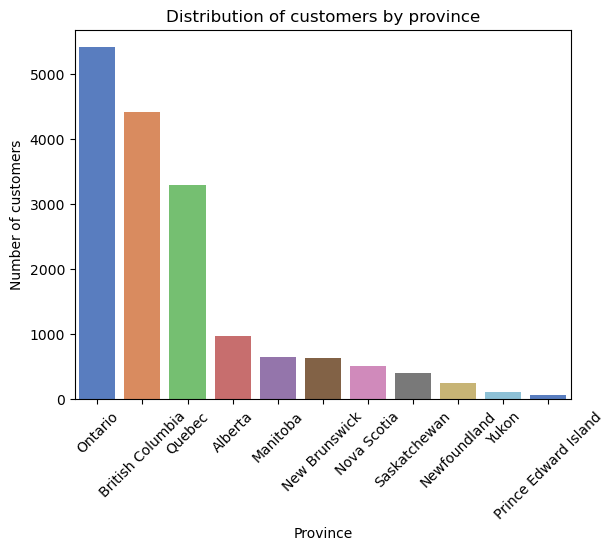

In [103]:
#Once the calculation formula is complete, we create a barplot graph for a better visualization.
#Bar plots excel at comparing values across different categories. 
#In this case, our categories are the provinces. Each bar will represent a province, and its length will correspond to the number of customers. 
#This makes it easy to see which provinces have the most and fewest customers.

sns.barplot(x="Province", 
            y= "Loyalty Number", 
            data=province_counts, 
            legend=False,
            palette='muted')

plt.title('Distribution of customers by province')
plt.xlabel('Province')
plt.ylabel('Number of customers')
plt.xticks(rotation=45)



**Key Observations:**

* **Dominant Provinces:**
    * Ontario clearly has the highest number of customers, significantly outnumbering all other provinces.
    * British Columbia is the second most populous province in terms of customers, though still considerably less than Ontario.
    * Quebec is the third most populous.
* **Significant Drop-Off:**
    * There's a substantial drop-off in customer numbers after Quebec. Alberta, the fourth most populous, has significantly fewer customers compared to the top three.
* **Low Customer Counts:**
    * Provinces like Newfoundland, Yukon, and Prince Edward Island have very low customer counts.
* **Descending Order:**
    * The provinces are arranged in descending order of customer count, making it easy to see the relative customer populations.

**Insights and Interpretations:**

* **Geographic Concentration:**
    * The data indicates a strong geographic concentration of customers in the most populous provinces (Ontario, British Columbia, Quebec).
* **Market Penetration:**
    * The company has achieved high market penetration in Ontario, followed by British Columbia and Quebec. The other provinces have much lower market penetration.
* **Potential for Growth:**
    * The significantly lower customer counts in provinces like Alberta, Manitoba, and others suggest potential for growth in these regions.
* **Resource Allocation:**
    * The company might consider allocating more resources to the provinces with higher customer counts, while also exploring strategies to increase market penetration in the less populated provinces.
* **Demographic Factors:**
    * The customer distribution likely reflects the overall population distribution of Canada.


In [105]:
#4. How does the average salary compare among the different educational levels of customers?

#In order to answer this question, we have to group by education level and calculate average salary. To do so, we are going to use the operator .mean 

education_salary = df_no_nulls.groupby('Education')['Salary'].mean().reset_index().sort_values('Salary', ascending=False)

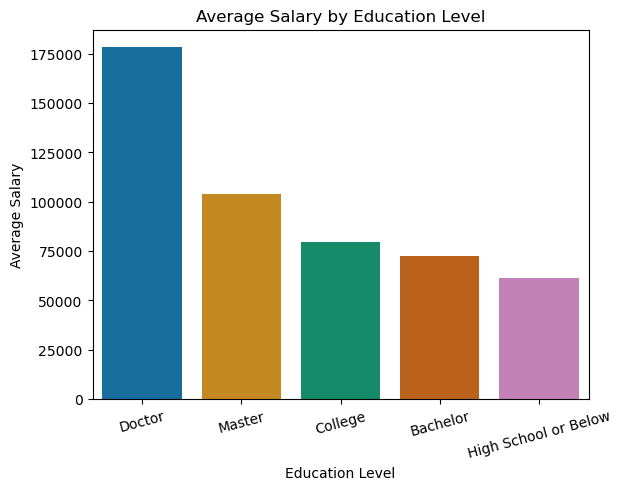

In [108]:
#Once the calculation formula is complete, we create a barplot graph for a better visualization.
#Bar plots excel at comparing values across different categories. 
#In this case, our categories are the different education levels. 
#Each bar will represent an education level, and its length will correspond to the salary height. 
#This makes it easy to see which education levels have the highest and the lowest salaries.

sns.barplot(x="Education", 
            y= "Salary", 
            hue="Education",
            legend=False,
            data=education_salary, 
            palette="colorblind")

plt.title("Average Salary by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Average Salary")
plt.xticks(rotation=15);



**Key Observations:**

* **Clear Positive Correlation:**
    * There's a clear positive correlation between education level and average salary. As education level increases, average salary tends to increase as well.
* **Doctoral Degree Dominance:**
    * Individuals with a doctoral degree have the highest average salary, significantly higher than any other education level.
* **Progressive Increase:**
    * There's a progressive increase in average salary from "High School or Below" to "Bachelor", "College", and "Master".
* **Significant Jump:**
    * There is a very large jump in average salary from Master to Doctor.




In [109]:
#5. What is the proportion of customers with different types of loyalty cards?

#In order to calculate this proportion regarding different types of loyalty cards, we need to group by 'Loyalty Card' column and posteriorly pass a unique loyalty number filter for each client. 

loyalty_card_counts = df_no_nulls.groupby('Loyalty Card')['Loyalty Number'].nunique()
loyalty_card_counts


Loyalty Card
Aurora    3429
Nova      5671
Star      7637
Name: Loyalty Number, dtype: int64

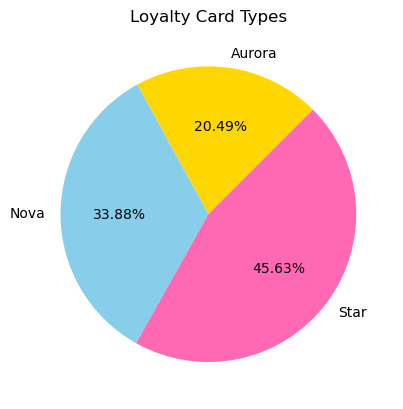

In [110]:
#Once the calculation formula is complete, we create a pie chart graph for a better visualization. Bar plots excel at showing proportions of a whole. 
#In this case, our categories are the different loyalty card types. We can quickly see which loyalty card types are most and least common, expressed in percentages.


plt.pie(x=loyalty_card_counts.values, 
        labels=loyalty_card_counts.index,  
        autopct='%1.2f%%',
        startangle=45,
        colors=['#FFD700', '#87CEEB', '#FF69B4'])
plt.title("Loyalty Card Types", fontsize=12)
plt.show()



**Key Observations:**

* **Star Dominance:** The "Star" loyalty card is the most prevalent, accounting for 45.63% of the customer base. This indicates that nearly half of the customers hold this type of card.
* **Nova Second:** The "Nova" loyalty card is the second most common, representing 33.88% of customers.
* **Aurora Lowest:** The "Aurora" loyalty card is the least common, with 20.49% of customers holding it.
* **Clear Proportions:** The pie chart effectively visualizes the relative proportions of each card type, making it easy to compare their prevalence.

**Insights and Interpretations:**

* **Popularity of Star Card:** The "Star" card's popularity suggests that it might offer the most attractive benefits or be the easiest to obtain.
* **Significant Nova Holders:** The "Nova" card also holds a significant portion of the market, indicating that it caters to a substantial segment of customers.
* **Aurora's Niche:** The "Aurora" card's lower prevalence might indicate that it caters to a specific niche or has more restrictive requirements.
* **Loyalty Program Analysis:** This data provides valuable insights into the effectiveness and distribution of the loyalty program's different tiers.
* **Marketing and Strategy:** This information can be used to inform marketing strategies and potentially adjust the benefits or requirements of the various loyalty cards.




In [111]:
# 6. How are customers distributed according to their marital status and gender?

#In order to answer this final question, we must count unique customers by marital status and gender, grouping them through the corresponding columns, and then passing the unique loyalty number filter. 

marital_gender_counts = df_no_nulls.groupby(['Marital Status', 'Gender'])['Loyalty Number'].nunique().reset_index()
marital_gender_counts




,Marital Status,Gender,Loyalty Number
0,Divorced,Female,1269
1,Divorced,Male,1249
2,Married,Female,4869
3,Married,Male,4866
4,Single,Female,2272
5,Single,Male,2212


Text(0.5, 0, 'Marital status')

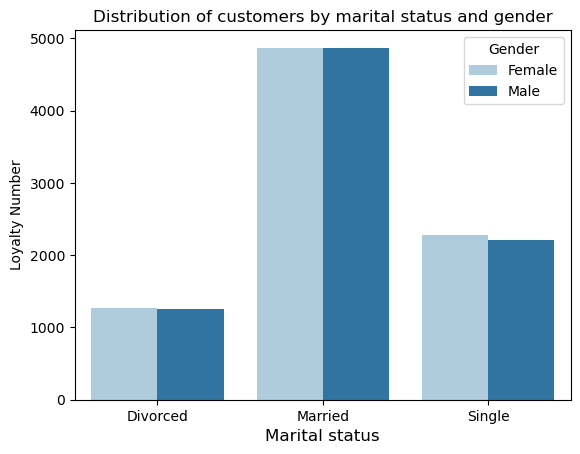

In [112]:
#Once the calculation formula is complete, we create a bar plot graph for a better visualization. Bar plots excel at showing proportions of a whole. 
#We're comparing the number of customers across different categories (marital status and gender).
#The height of each bar directly corresponds to the number of customers, making the plot easy to interpret and understand.


sns.barplot(x='Marital Status', 
            y="Loyalty Number", 
            hue='Gender', 
            data=marital_gender_counts, 
            palette="Paired")
plt.title('Distribution of customers by marital status and gender', fontsize=12)
plt.xlabel('Marital status', fontsize=12)



**Key Observations:**

* **Married Dominance:**
    * The "Married" category has the highest number of customers, significantly higher than both "Divorced" and "Single".
* **Gender Balance in Married:**
    * Within the "Married" category, there's a near-equal distribution of male and female customers.
* **Similar Gender Distribution in Divorced and Single:**
    * In both the "Divorced" and "Single" categories, the number of male and female customers is also relatively close, with a slight edge to females in the divorced category.
* **Divorced and Single Comparison:**
    * The "Divorced" and "Single" categories have significantly lower customer counts compared to "Married". The divorced category has the lowest amount of customers.

**Insights and Interpretations:**

* **Married Segment Importance:**
    * The "Married" segment represents the largest customer base, making it a crucial target for marketing and customer retention efforts.
* **Gender Neutrality:**
    * The relatively balanced gender distribution across all marital status categories suggests that the customer base is not heavily skewed towards one gender.
* **Marital Status Influence:**
    * Marital status appears to be a significant factor in customer distribution, with "Married" customers being the most prevalent.
* **Possible Life Stage Factors:**
    * The data could reflect life stage factors, with married individuals potentially having greater travel needs or disposable income.


## STAGE 5. BONUS CONTENT ## 

At this final stage, we seek to evaluate if there are significant differences in the number of flights booked based on the educational level of customers. 
To successfully do this, the steps we shall follow are:

>1. Data Preparation: Filter the dataset to include only the relevant columns: 'Flights Booked' and 'Education'.

>2. Descriptive Analysis: Group the data by educational level and calculate basic descriptive statistics (such as the average, standard deviation) of the number of flights booked for each group.

>3. Statistical Test: Perform a hypothesis test to determine if there is a significant difference in the number of flights booked between the different educational levels. Since there are several groups, we shall compare them two by two.

**1. DATA PREPARATION**

In [113]:
#First we filter the dataset to include only the relevant columns 'Flights Booked' and 'Education':

filtered_dataset = df_no_nulls[['Education', 'Flights Booked']]

#We show the first five rows of the aforementioned data using the operator head()

filtered_dataset.head()


,Education,Flights Booked
0,Bachelor,3
1,Bachelor,2
2,Bachelor,6
3,Bachelor,4
4,Bachelor,0


In [115]:
#For the more profound visualisation of the relevant columns, we use the operator .describe().T

filtered_dataset.groupby ('Education')['Flights Booked'].describe().T 

Education,Bachelor,College,Doctor,High School or Below,Master
count,252567.000000,102260.000000,17731.000000,18915.000000,12287.000000
mean,4.110288,4.169744,4.175512,4.176209,4.200700
std,5.221671,5.246040,5.256971,5.239267,5.213956
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000
75%,8.000000,8.000000,8.000000,8.000000,8.000000
max,21.000000,21.000000,21.000000,21.000000,21.000000


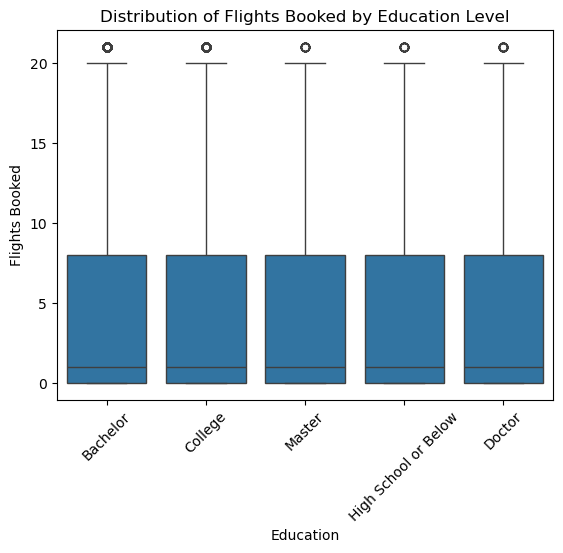

In [116]:
#Finally, we quickly visualize the dataframe results using a basic boxplot, for faster access and easier creation of possible insights and analytical conclusions. 
#It allows us to easily compare the distributions of `Flights_Booked` across different education levels.
#Identification of Outliers: It shows potential outliers in each education group.
#Visualizing Central Tendency and Spread: it visualizes the median and quartiles, giving us a good sense of the central tendency and spread of the data.


sns.boxplot(x="Education", y="Flights Booked", data=filtered_dataset)
plt.xticks(rotation=45)
plt.title("Distribution of Flights Booked by Education Level")
plt.show()



**Key Observations:**

* **Similar Medians, Means and low STD:** The medians and means are very similar across all education levels, while std dispersion is low. This suggests that the "typical" number of flights booked isn't drastically different between the groups.
* **Similar Interquartile Ranges (IQRs):** The boxes themselves (representing the IQR, the middle 50% of the data) are also quite similar in size. This indicates comparable variability in flight bookings within each education level.
* **Outliers Present:** Each education level has a few outliers (the circles above the whiskers) indicating some individuals booked significantly more flights than the majority within their education group.
* **Overlapping Distributions:** The boxes largely overlap, which suggests that there might not be statistically significant differences in flight booking behavior between the education levels.

**Insights and Interpretations:**

* **Education May Not Be a Strong Predictor:** The lack of substantial differences between the boxes suggests that education level might not be a strong predictor of the number of flights booked. Other factors likely play a more significant role.
* **Outliers Warrant Investigation:** The outliers could represent frequent flyers or individuals with unique travel needs. Investigating these outliers might provide further insights.
* **Need for Statistical Testing:** While the visual inspection suggests little difference, statistical testing (as mentioned in your bonus instructions) is necessary to confirm whether the observed differences are statistically significant.

**In essence:**

The box plot suggests that, visually, there are not major differences in the amount of flights booked between the different education levels.


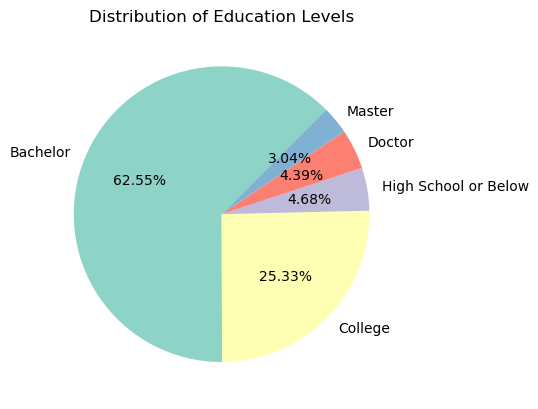

In [117]:
# Another interesting thing we might do is count the occurrences of each education level in the 'Education' column:

education_counts = filtered_dataset['Education'].value_counts()

#The pie chart visually represents the percentage of individuals belonging to each education category. 
#This provides context for our previous analysis (the box plot) by showing how the sample is distributed across the various education levels.
#We can quickly identify which education levels are most prevalent in our dataset. 
#This can be important for understanding the general characteristics of our customer base, and for extrapolating some marketing implications.

plt.pie(education_counts,
        labels=education_counts.index,
        autopct='%1.2f%%', 
        startangle=45, 
        colors=plt.cm.Set3.colors) 
plt.title("Distribution of Education Levels", fontsize=12)
plt.show()



**Key Observations:**

* **Bachelor's Dominance:**
    * The "Bachelor" education level is by far the most prevalent, accounting for 62.55% of the dataset. This indicates that the majority of customers in this dataset hold a bachelor's degree.
* **College Second:**
    * "College" is the second most common education level, representing 25.33% of the dataset.
* **Low Representation of Advanced Degrees:**
    * "Master" and "Doctor" education levels have very low representation, at 3.04% and 4.39%, respectively.
* **High School or Below:**
    * "High School or Below" has a very small percentage of the data at 4.68%.

**Insights and Interpretations:**

* **Skewed Distribution:**
    * The distribution of education levels is heavily skewed towards "Bachelor" and "College" degrees. This suggests that the customer base is primarily composed of individuals with these education levels.
* **Target Audience:**
    * The data suggests that the company's products or services might be more appealing to individuals with bachelor's or college degrees.
* **Marketing Implications:**
    * Marketing strategies could be tailored to target individuals with bachelor's and college degrees, as they represent the majority of the customer base.


**2. DESCRIPTIVE ANALYSIS**

In [119]:
#We group the data according to the educational level and calculate basic descriptive statistics through simultaneous aggregation of multiple filters, such as the .mean or .std of the booked flight numbers for each group:

stats_by_education = filtered_dataset.groupby ('Education')['Flights Booked'].agg(['mean', 'median', 'std'])
stats_by_education

,mean,median,std
Education,,,
Bachelor,4.110288,1.0,5.221671
College,4.169744,1.0,5.246040
Doctor,4.175512,1.0,5.256971
High School or Below,4.176209,1.0,5.239267
Master,4.200700,1.0,5.213956


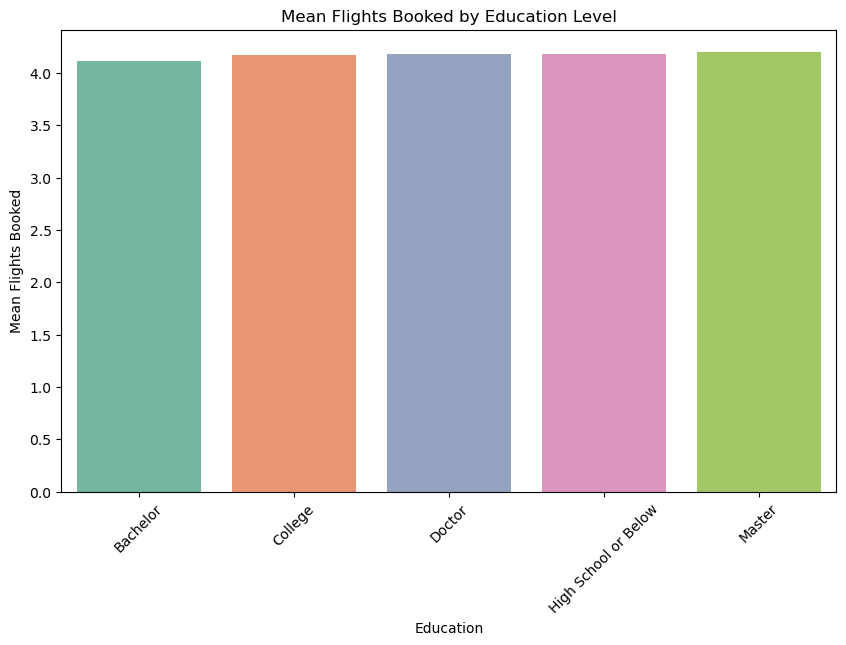

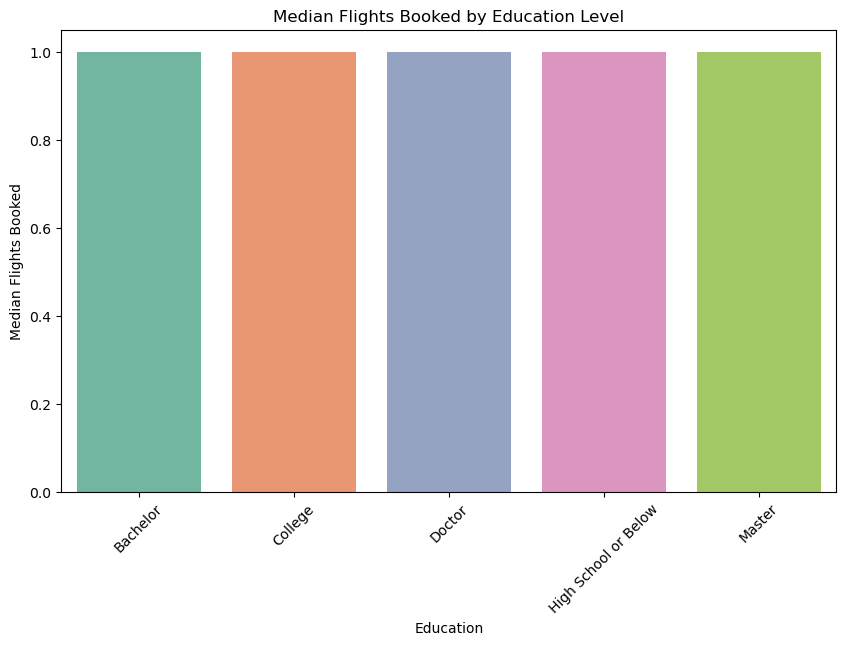

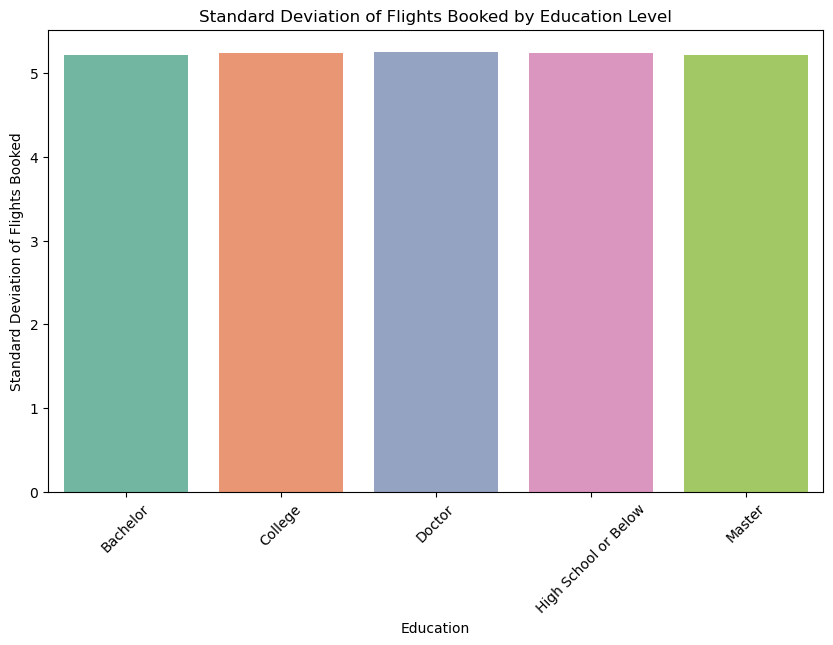

In [120]:
# We shall provide three types of visualization: via bar plots, box plot and violin plot. 

#The visualization via bar plots will be calculated separately for mean, median and std. 
#This approach allows for a clear and accurate comparison of these statistics across different education levels.

# Plot Mean
plt.figure(figsize=(10, 6))
sns.barplot(x=stats_by_education.index, y="mean", data=stats_by_education.reset_index(), palette="Set2")
plt.title("Mean Flights Booked by Education Level")
plt.ylabel("Mean Flights Booked")
plt.xticks(rotation=45)
plt.show()

# Plot Median
plt.figure(figsize=(10, 6))
sns.barplot(x=stats_by_education.index, y="median", data=stats_by_education.reset_index(), palette="Set2")
plt.title("Median Flights Booked by Education Level")
plt.ylabel("Median Flights Booked")
plt.xticks(rotation=45)
plt.show()

# Plot Standard Deviation
plt.figure(figsize=(10, 6))
sns.barplot(x=stats_by_education.index, y="std", data=stats_by_education.reset_index(), palette="Set2")
plt.title("Standard Deviation of Flights Booked by Education Level")
plt.ylabel("Standard Deviation of Flights Booked")
plt.xticks(rotation=45)
plt.show()

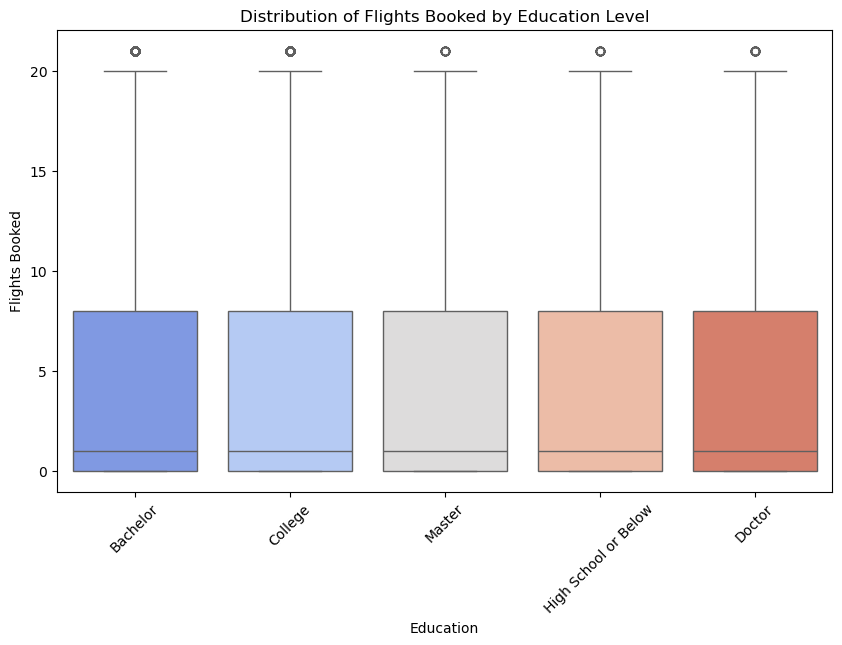

In [121]:
#The visualization via boxplot - for better understanding variability and outliers:

plt.figure(figsize=(10, 6))
sns.boxplot(x="Education", 
            y="Flights Booked", 
            data=filtered_dataset,  # Use filtered_dataset, not stats_by_education
            palette="coolwarm")
plt.title("Distribution of Flights Booked by Education Level")
plt.ylabel("Flights Booked")
plt.xticks(rotation=45)
plt.show()


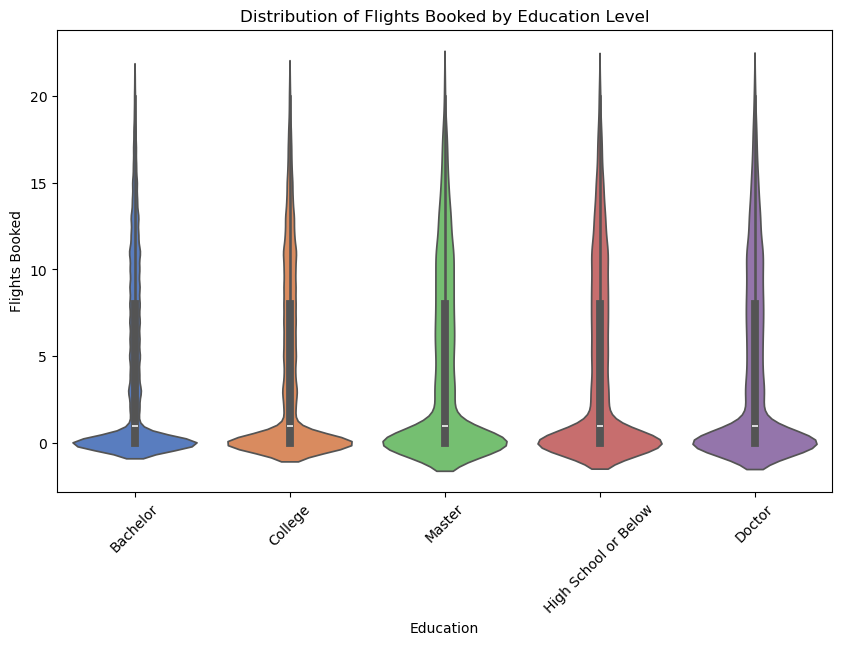

In [122]:
#The visualization via violin plot serves as an alternative to Box Plot, due to the fact it shows full distribution.
#It is quite similar to a box plot but it also shows the density of data points. 

plt.figure(figsize=(10, 6))
sns.violinplot(x="Education", y="Flights Booked", data=filtered_dataset, palette="muted")

plt.title("Distribution of Flights Booked by Education Level")
plt.ylabel("Flights Booked")
plt.xticks(rotation=45)
plt.show()

📊 Overall Key Insights from the Descriptive Analysis:
1. Similar Booking Behavior Across Education Levels

The mean number of flights booked is very similar across all education levels (~4.1 to 4.2).
This suggests that education level does not strongly influence the number of flights booked—all groups tend to book a similar number of flights on average.

2. High Standard Deviation (~5.2)

The standard deviation (std) is quite large (~5.2) compared to the mean (~4.1).
This indicates high variability in flight bookings—some people book very few flights, while others book a lot.
There might be a small group of frequent travelers who significantly increase the mean.

3. No Strong Trend Among Education Levels

The numbers don’t show a clear relationship between education level and flights booked.
Whether someone has a Doctorate, a Master's, or just a High School education, their booking behavior is almost the same.

**3. STATISTICAL ANALYSIS**

In [123]:
#Statistical Analysis: performing a hypothesis test

In [126]:
# We obtain data from Flights_Booked for each group of Education:

high_school_or_below = filtered_dataset[filtered_dataset['Education'] == 'High School or Below']['Flights Booked'].to_numpy()
bachelor = filtered_dataset[filtered_dataset['Education'] == 'Bachelor']['Flights Booked'].to_numpy()
college = filtered_dataset[filtered_dataset['Education'] == 'College']['Flights Booked'].to_numpy()
master = filtered_dataset[filtered_dataset['Education'] == 'Master']['Flights Booked'].to_numpy()
doctor = filtered_dataset[filtered_dataset['Education'] == 'Doctor']['Flights Booked'].to_numpy()

# We define the hypothesis test superfunction:

def hypothesis_test(*args):
    """
    Performs a hypothesis test to compare groups.
    1. First checks if the data is normally distributed using the Shapiro-Wilk or Kolmogorov-Smirnov test.
    2. If the data is normally distributed, it uses Bartlett to test for equality of variances. If not normal, it uses Levene.
    3. If variances are equal, uses Student's t-test; if not, it uses Welch's version.
    4. If the data is not normally distributed, it uses the Mann-Whitney U test.

    Parameters:
    *args: lists or arrays with the data of each group. Expects TWO groups to compare.

    Returns:
    dict with results of the normality, variance, and hypothesis tests.
    """
    
    # Verify if there are at least two groups
    if len(args) < 2:
        raise ValueError("At least two datasets are needed to perform the test.")
    
    # Check normality in each group
    normality = []
    for group in args:
        if len(group) > 50:
            p_value_norm = stats.kstest(group, 'norm').pvalue  # Kolmogorov-Smirnov if n > 50
        else:
            p_value_norm = stats.shapiro(group).pvalue  # Shapiro-Wilk if n <= 50
        normality.append(p_value_norm > 0.05)

    data_normal = all(normality)  # True if all groups are normal

    # Test for equality of variances
    if data_normal:
        p_value_variance = stats.bartlett(*args).pvalue  # Bartlett's test if data is normal
    else:
        p_value_variance = stats.levene(*args, center="median").pvalue  # Levene's test if data is not normal

    variances_equal = p_value_variance > 0.05

    # Apply the appropriate test
    if data_normal:
        if variances_equal:
            t_stat, p_value = stats.ttest_ind(*args, equal_var=True)
            test_used = "Student's t-test (equal variances)"
        else:
            t_stat, p_value = stats.ttest_ind(*args, equal_var=False)
            test_used = "Welch's t-test (unequal variances)"
    else:
        t_stat, p_value = stats.mannwhitneyu(*args)
        test_used = "Mann-Whitney U"

    # Significance level
    alpha = 0.05

    # Results
    result = {
        "Normality Test": normality,
        "Data Normal": data_normal,
        "p-value Variance": p_value_variance,
        "Variances Equal": variances_equal,
        "Test Used": test_used,
        "Statistic": t_stat,
        "p-value": p_value,
        "Conclusion": "H0 has been rejected. That is, there are significant differences." if p_value < alpha else "Failed to reject H0. That is, there are no significant differences."
    }

    # Print results more clearly
    print("\n **Hypothesis Test Results** ")
    print(f"✅ Normality Test: {'Yes' if data_normal else 'No'}")
    print(f"   - Normality by group: {normality}")
    print(f"✅ Variance Test: {'Equal' if variances_equal else 'Unequal'} (p = {p_value_variance:.4f})")
    print(f"✅ Test Applied: {test_used}")
    print(f" Statistic: {t_stat:.4f}, p-value: {p_value:.4f}")
    print(f" Conclusion: {result['Conclusion']}\n")

    return p_value # Return p_value

# List groups
groups = [high_school_or_below, college, master, bachelor, doctor]
n_groups = len(groups)

# Comparisons between all possible pairs of groups without using itertools
p_values = []
for i in range(n_groups):
    for j in range(i + 1, n_groups):  # Only compare pairs, without repeating
        print(f"Comparing Group {i+1} and Group {j+1}")
        p_val = hypothesis_test(groups[i], groups[j])
        p_values.append(p_val)


Comparing Group 1 and Group 2

 **Hypothesis Test Results** 
✅ Normality Test: No
   - Normality by group: [False, False]
✅ Variance Test: Equal (p = 0.9502)
✅ Test Applied: Mann-Whitney U
 Statistic: 969453228.5000, p-value: 0.5757
 Conclusion: Failed to reject H0. That is, there are no significant differences.

Comparing Group 1 and Group 3

 **Hypothesis Test Results** 
✅ Normality Test: No
   - Normality by group: [False, False]
✅ Variance Test: Equal (p = 0.7433)
✅ Test Applied: Mann-Whitney U
 Statistic: 115772018.5000, p-value: 0.5557
 Conclusion: Failed to reject H0. That is, there are no significant differences.

Comparing Group 1 and Group 4

 **Hypothesis Test Results** 
✅ Normality Test: No
   - Normality by group: [False, False]
✅ Variance Test: Equal (p = 0.1589)
✅ Test Applied: Mann-Whitney U
 Statistic: 2409144796.0000, p-value: 0.0360
 Conclusion: H0 has been rejected. That is, there are significant differences.

Comparing Group 1 and Group 5

 **Hypothesis Test Result



**Summary of Results**

We conducted pairwise comparisons between the five education level groups ("High School or Below", "College", "Master", "Bachelor", "Doctor") regarding the number of flights booked. Here's a summary of the statistically significant differences we found:

* **Group 1 ("High School or Below") vs. Group 4 ("Bachelor"):** Significant difference.
* **Group 2 ("College") vs. Group 4 ("Bachelor"):** Significant difference.
* **Group 3 ("Master") vs. Group 4 ("Bachelor"):** Significant difference.

**Interpretation**

* **"Bachelor" Stands Out:** The "Bachelor" group shows statistically significant differences in the number of flights booked compared to the "High School or Below", "College", and "Master" groups. This suggests that individuals with a Bachelor's degree exhibit distinct flight booking behavior compared to those with lower or higher levels of education.
* **No Other Significant Differences:** There were no statistically significant differences between any other pairs of groups. This implies that, in terms of flight booking behavior, there are no major distinctions between "High School or Below", "College", "Master", and "Doctor" groups.

**Overall Conclusions**

* **Education Level Plays a Limited Role:** While there are some differences, the overall conclusion is that education level, on its own, does not appear to be a strong predictor of flight booking behavior. The only notable distinction is the "Bachelor" group.
* **Other Factors Are More Important:** This suggests that other factors, such as income, travel preferences, or lifestyle, might have a more substantial influence on how many flights a person books.
* **Focus on "Bachelor" Group:** If the company is looking to target specific education levels with marketing or promotions, the "Bachelor" group might be worth focusing on due to their distinct behavior.



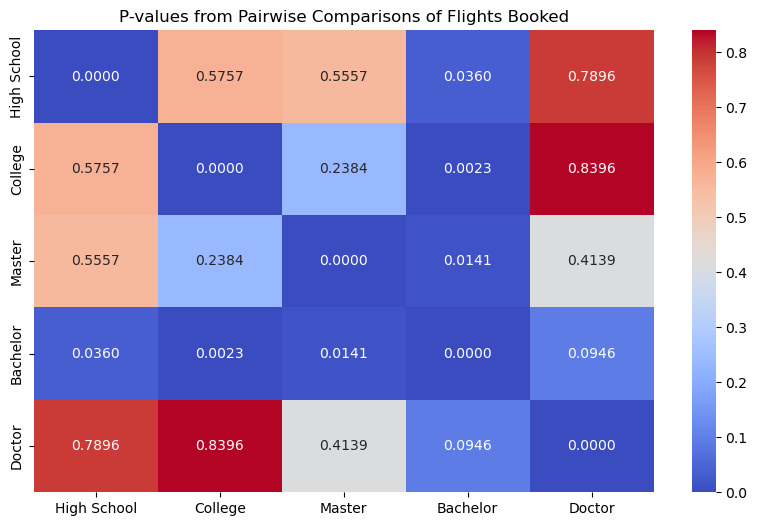

In [312]:
#In the end, in order to highlight the overall pairwise comparisons and the p-values, we opted to use a heatmap for showcasing these.

# Convert p_values list to matrix
n = len(groups)
p_value_matrix = np.zeros((n, n))
k = 0
for i in range(n):
    for j in range(i + 1, n):
        p_value_matrix[i, j] = p_values[k]
        p_value_matrix[j, i] = p_values[k]
        k += 1
        
plt.figure(figsize=(10, 6))
sns.heatmap(p_value_matrix, annot=True, cmap="coolwarm", fmt=".4f",
            xticklabels=["High School", "College", "Master", "Bachelor", "Doctor"],
            yticklabels=["High School", "College", "Master", "Bachelor", "Doctor"])
plt.title("P-values from Pairwise Comparisons of Flights Booked")
plt.show()



**Key Observations:**

* **Significant Differences with "Bachelor":**
    * The "Bachelor" group shows statistically significant differences (p < 0.05) when compared to "High School", "College", and "Master". This is evident from the darker-colored cells in the heatmap where "Bachelor" intersects with these other education levels.
* **No Significant Differences Between Others:**
    * The other pairwise comparisons (excluding "Bachelor") show p-values greater than 0.05. This is evident from the lighter-colored cells. This indicates that there are no statistically significant differences in the number of flights booked between those groups.
* **Symmetrical Matrix:**
    * The heatmap is symmetrical, as expected, because the p-value for comparing group A to group B is the same as comparing group B to group A.
* **Diagonal of Zeros:**
    * The diagonal of the heat map is 0.0000, as expected, because there is no difference between a group and itself.

**Conclusions:**

1.  **"Bachelor" Group Distinct:**
    * The "Bachelor" education level group exhibits a significantly different pattern in the number of flights booked compared to the "High School", "College", and "Master" groups.
2.  **Education Level, Limited Impact:**
    * Apart from the "Bachelor" group, there are no statistically significant differences in flight booking behavior between the other education levels.
3.  **Focus on "Bachelor" Segment:**
    * If the company aims to target specific education levels, the "Bachelor" group is the most distinct and might warrant focused marketing or promotional strategies.
4.  **Other Factors:**
    * The data suggests that factors other than education level might play a more substantial role in influencing flight booking behavior.

